In [77]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
!pip install seaborn
import seaborn as sns

In [5]:
!pip install missingno
import missingno as msno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [1]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [3]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [1]:
!pip install xgboost
import xgboost as xgb

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport

#pre processing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

#models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve, average_precision_score
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

#others

import time
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
import pickle


pd.set_option('display.max_columns', None)

In [3]:
customer = pd.read_csv('C:\\Users\madhu\Documents\Skills and Misc notes\Data Mining\BankChurners.csv')

In [4]:
customer.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
# profile = ProfileReport(customer, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

# Basic data cleaning

In this step we are going to drop some useless columns, correct possible typos in the column names ,check for duplicates and correct casting.

In [6]:
customer.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
customer.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [8]:
#looking for missing values
customer.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<AxesSubplot: >

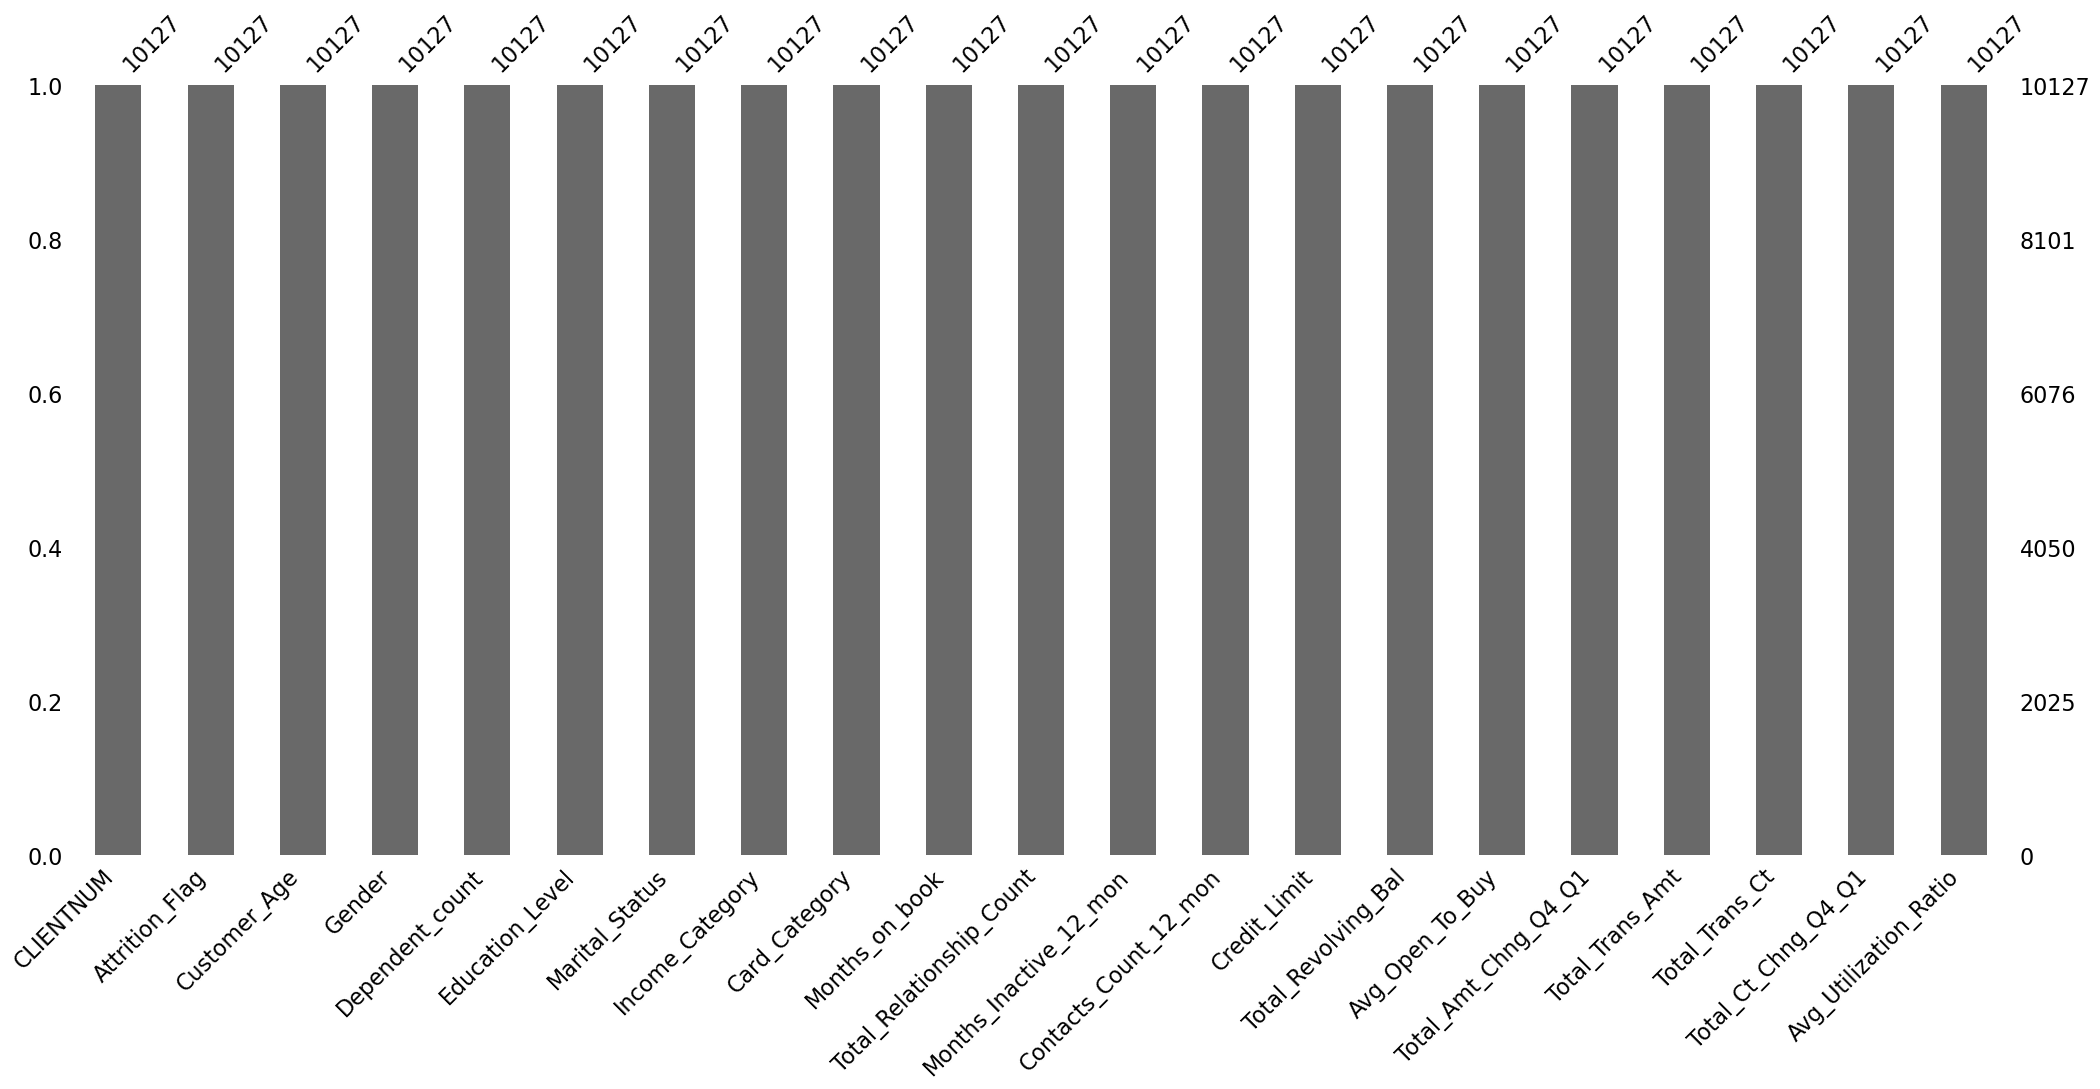

In [9]:
msno.bar(customer)

At first glance we don't have problems with missing values.

In [10]:
#checking duplicates
customer.duplicated().sum()

0

There isn't duplicates on this dataset.

In [11]:
# checking for typos on the categorical variables
customer_cat = customer.select_dtypes('object').columns

for col in customer_cat:
    print(customer[col].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [12]:
#casting
customer.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Everything is ok.

# Exploratory Data Analysis

In [13]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


- **Age**: The average age of customers is 46 years, with a range from 26 years to 73 years.  The top of the dustribution is middle age, ranging around 50 years.
- **Dependents:** On average, each client has 2 dependents, which could provide insight into the household size and potential financial responsibilities of the customers. 
-  **Months on book** Customers have been with the bank for an average of 35 months, which is equivalent to almost 3 years. The minimum duration is 13 months, indicating a relatively stable customer base. Understanding the tenure of customers can help identify long-term customers who may be at higher risk of churn due to changes in their financial situation or other factors.
- **Credit limit**: The average credit limit for customers is $8631. 
- **Months innactive on the last year:** On average, customers have been inactive for 2 months in the last year. 

In [14]:
#categorial variables
customer.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


- Mostly of the client base is women, have higher education, are married and earn less tha $40.000 per year.

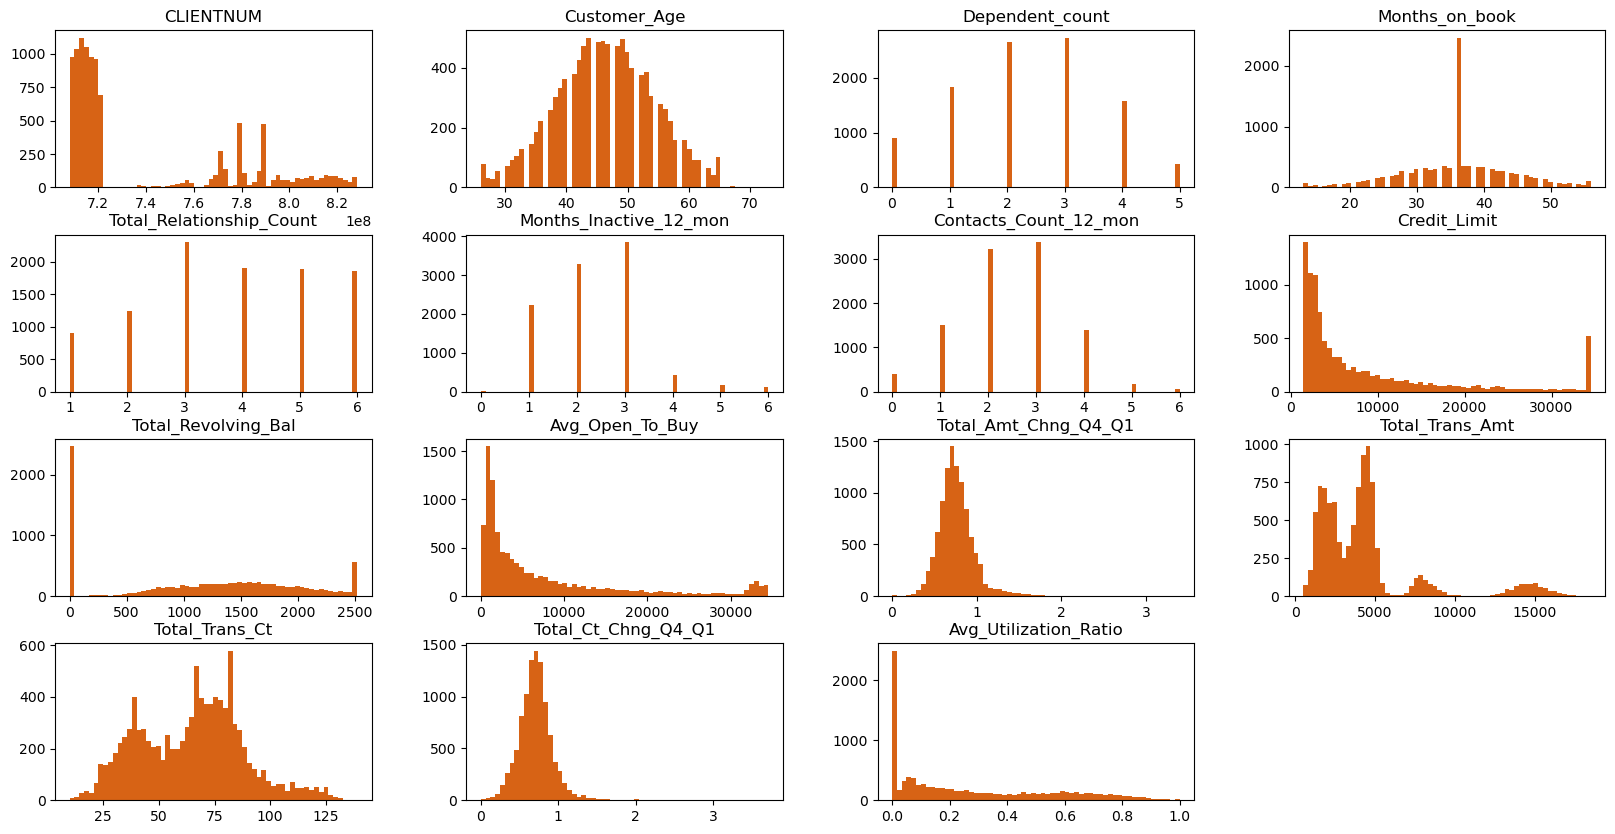

In [15]:
customer.hist(bins=60, grid= False, figsize=(20,10), color = '#D76315')
plt.show()

## Outliers


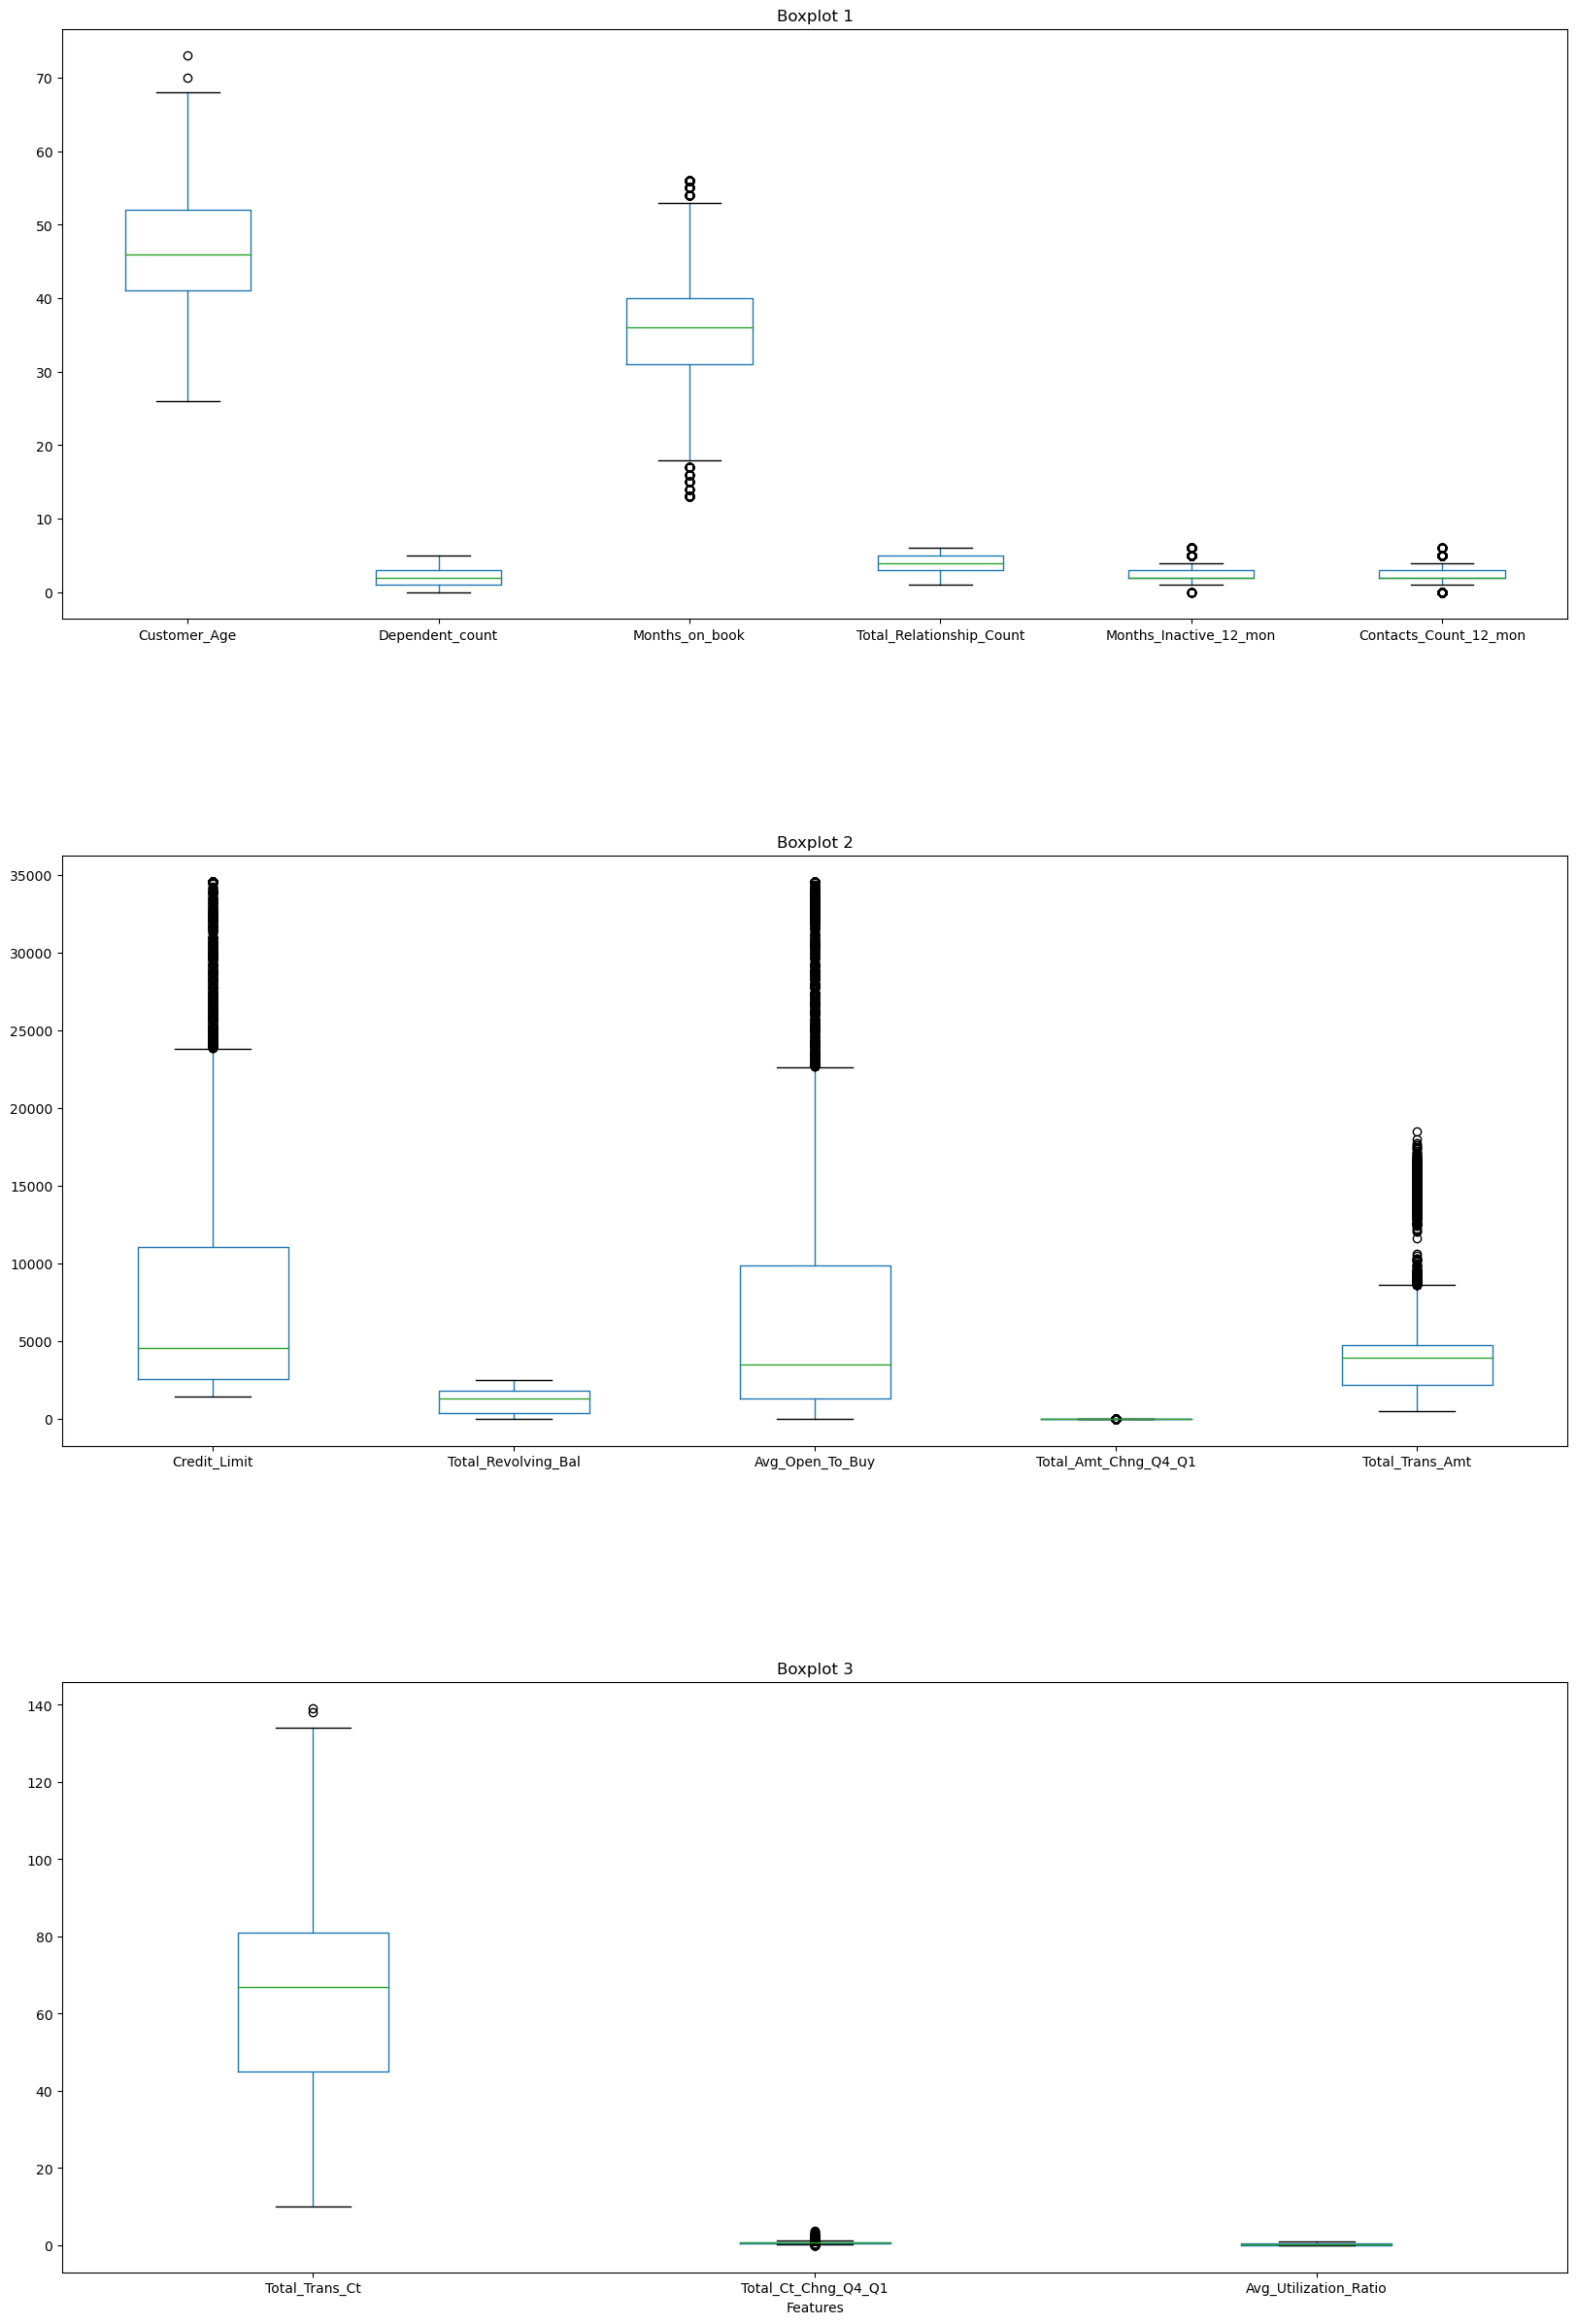

In [16]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

# Plot the first set of columns in the first subplot
customer.boxplot(column=['Customer_Age', 'Dependent_count', 'Months_on_book',
                         'Total_Relationship_Count', 'Months_Inactive_12_mon',
                         'Contacts_Count_12_mon'], ax=axes[0], grid= False)
axes[0].set_title('Boxplot 1')

# Plot the second set of columns in the second subplot
customer.boxplot(column=['Credit_Limit', 'Total_Revolving_Bal',
                         'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                         'Total_Trans_Amt'], ax=axes[1], grid= False)
axes[1].set_title('Boxplot 2')

# Plot the third set of columns in the third subplot
customer.boxplot(column=['Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                         'Avg_Utilization_Ratio'], ax=axes[2], grid= False)
axes[2].set_title('Boxplot 3')

# Add a common x-axis label and adjust spacing between subplots
plt.xlabel('Features')
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()



We don't have many outliers in this dataset.

## Univariate analysis

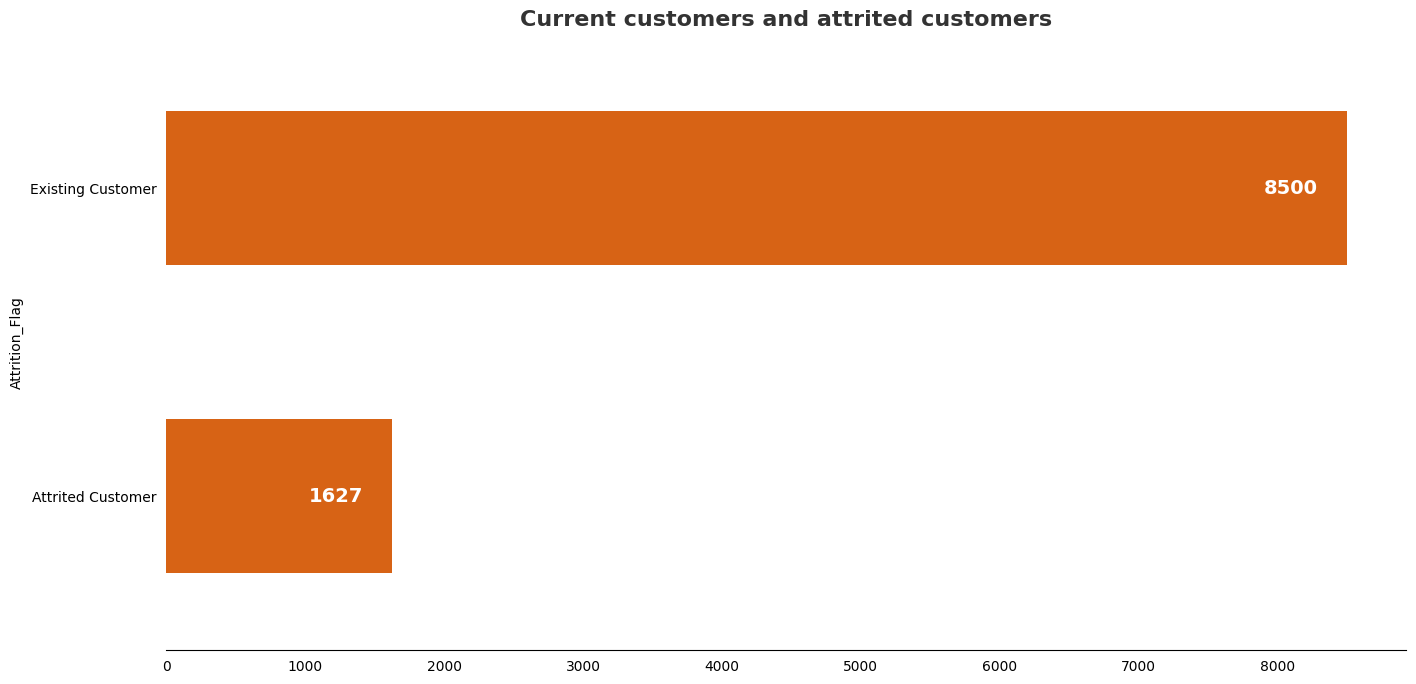

In [16]:
#atrttion
afg = (customer['Attrition_Flag'].value_counts().sort_values(ascending = True)
      .plot(kind = 'barh', color = ['#D76315'], xlabel = '', figsize = (16,8), align = 'center'))

plt.title('Current customers and attrited customers', size = 16, weight = 'bold', alpha = 0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)

rects = afg.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = - 60
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        color = 'white',
        weight = 'bold',
            size = 14)                      
plt.show()

There is way more 'Existing Customer' than 'Attrited Customer'. We can see that the dataset has imbalanced classes.

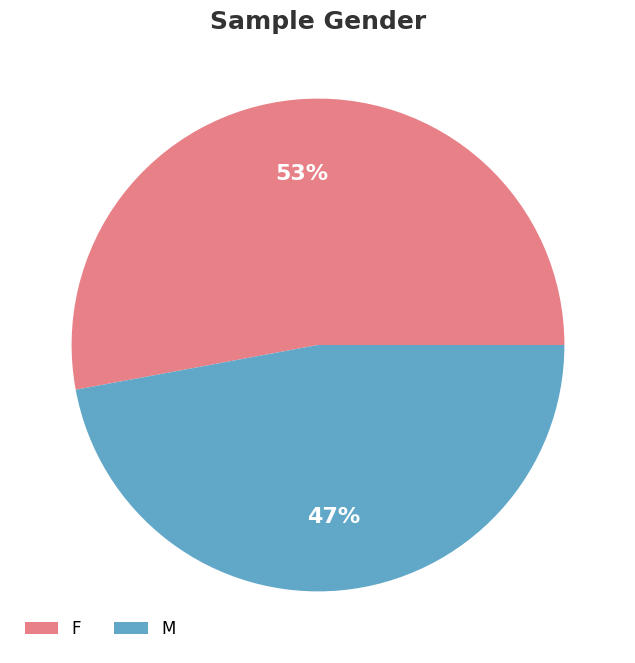

In [17]:
#genero
colors = ['#e88087', '#61A7C8']
(customer['Gender'].value_counts().plot.pie(autopct='%1.0f%%', ylabel = '',
                                           figsize=(16,8), legend=True,
                                           labeldistance=None,
                                           textprops={'fontsize':16, 'color':'white', 'weight':'bold'},
                                           pctdistance= 0.7, colors = colors))
plt.title('Sample Gender', alpha = 0.8, size = 18, weight = 'bold')
plt.legend(loc = 3, frameon=False, fontsize = 12, ncol=3)
plt.show()

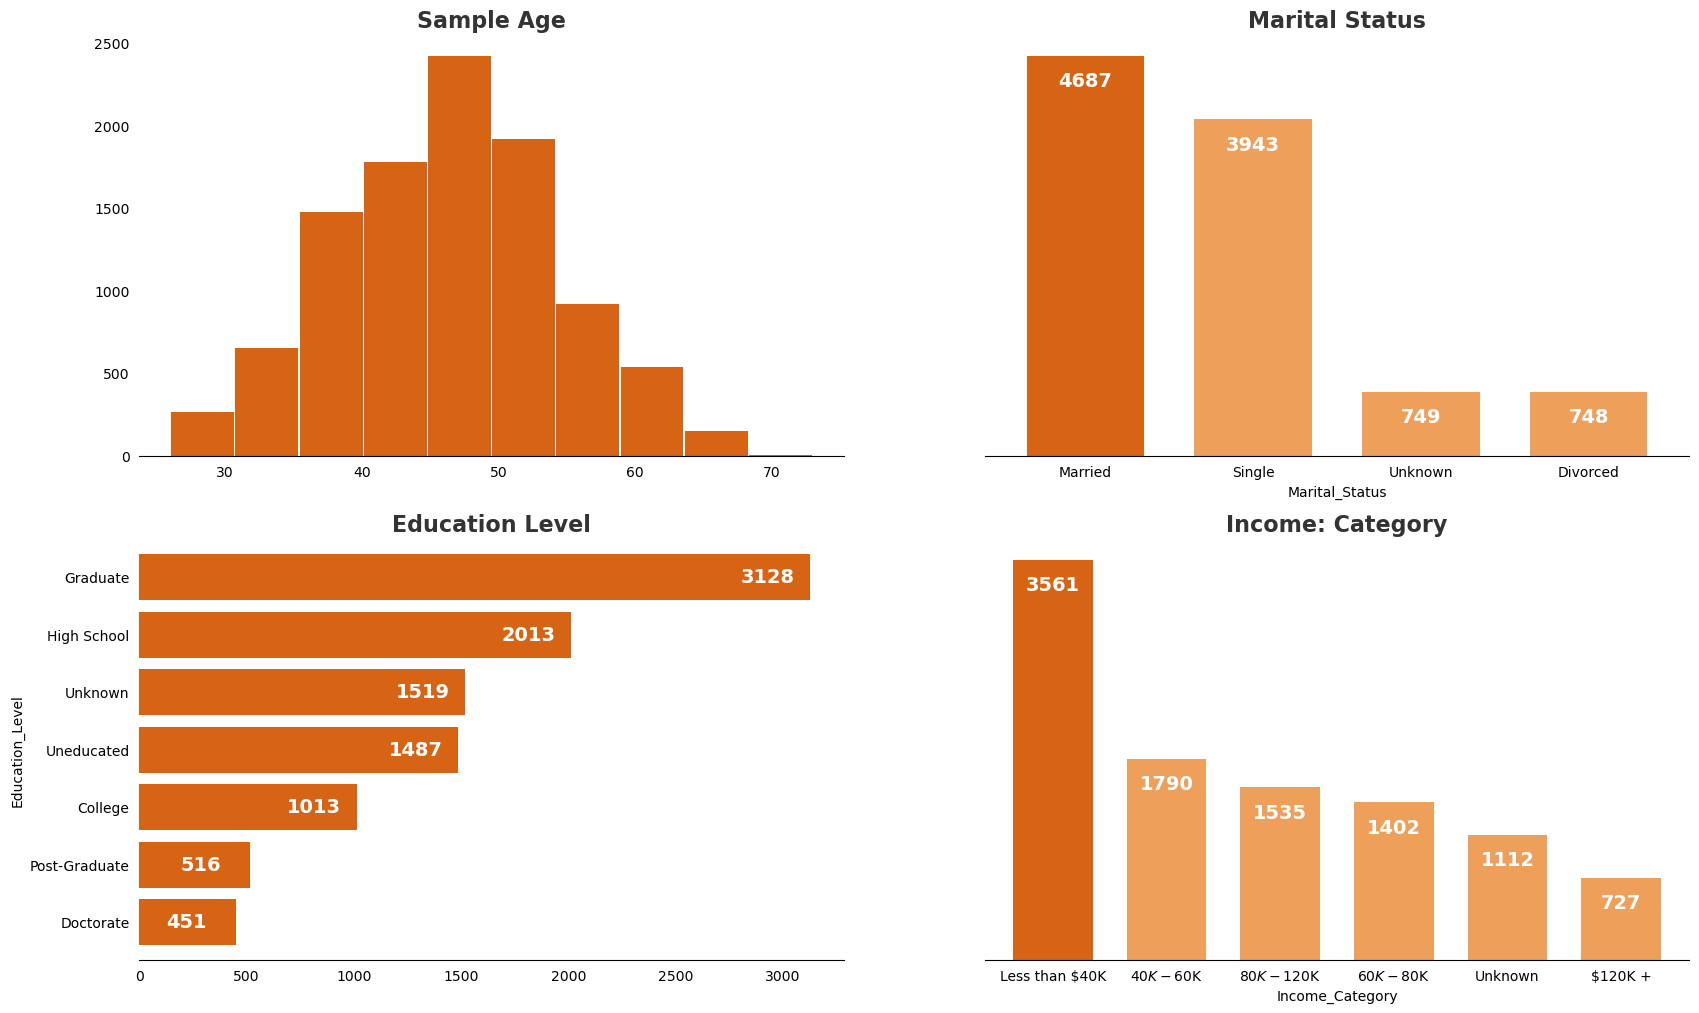

In [17]:
# Subplot 1 - Age
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
customer['Customer_Age'].hist(grid=False, color='#D76315', rwidth=0.98)
plt.title('Sample Age', alpha=0.8, size=16, weight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom=False, left=False)

# Subplot 2 - Marital Status
plt.subplot(2, 2, 2)
msg = (customer['Marital_Status'].value_counts().plot(kind='bar', rot=0,  width=0.7,
                                                     color=['#D76315', '#EEA05A', '#EEA05A', '#EEA05A']))
plt.title('Marital Status', size=16, alpha=0.8, weight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom=False, left=False)
plt.yticks([])

for rect in msg.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -25
    va = 'bottom'
    if y_value < 0:
        space *= -1
        va = 'top'
    label = "{:.0f}".format(y_value)
    msg.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha='center',
        va=va,
        color='white',
        size=14,
        weight='bold')



# Subplot 3 - Education Level
plt.subplot(2, 2, 3)
els = (customer['Education_Level'].value_counts().sort_values(ascending=True)
       .plot(kind='barh', color=['#D76315'], xlabel='', width=0.8))
plt.title('Education Level', size=16, weight='bold', alpha=0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom=False, left=False)

rects = els.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = -50
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.0f}".format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va='center',
        ha=ha,
        color='white',
        weight='bold',
        size=14)
    
# Subplot 4 - Income Category
plt.subplot(2, 2, 4)
icg = customer['Income_Category'].value_counts().plot(kind = 'bar', rot = 0,  width = 0.7,
                                                     color = ['#D76315', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A'])
plt.title('Income: Category', size = 16, alpha = 0.8, weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)
plt.yticks([])

for rect in icg.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = -25
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)
    icg.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'white',
        size = 14,
        weight = 'bold')                      
plt.show()


- Most of the dataset consists of adults aged between 30-55 years.
- The clients in the dataset have good educational backgrounds, with a majority of them having some form of higher education.
- Despite their educational qualifications, most of the clients earn less than $40K.

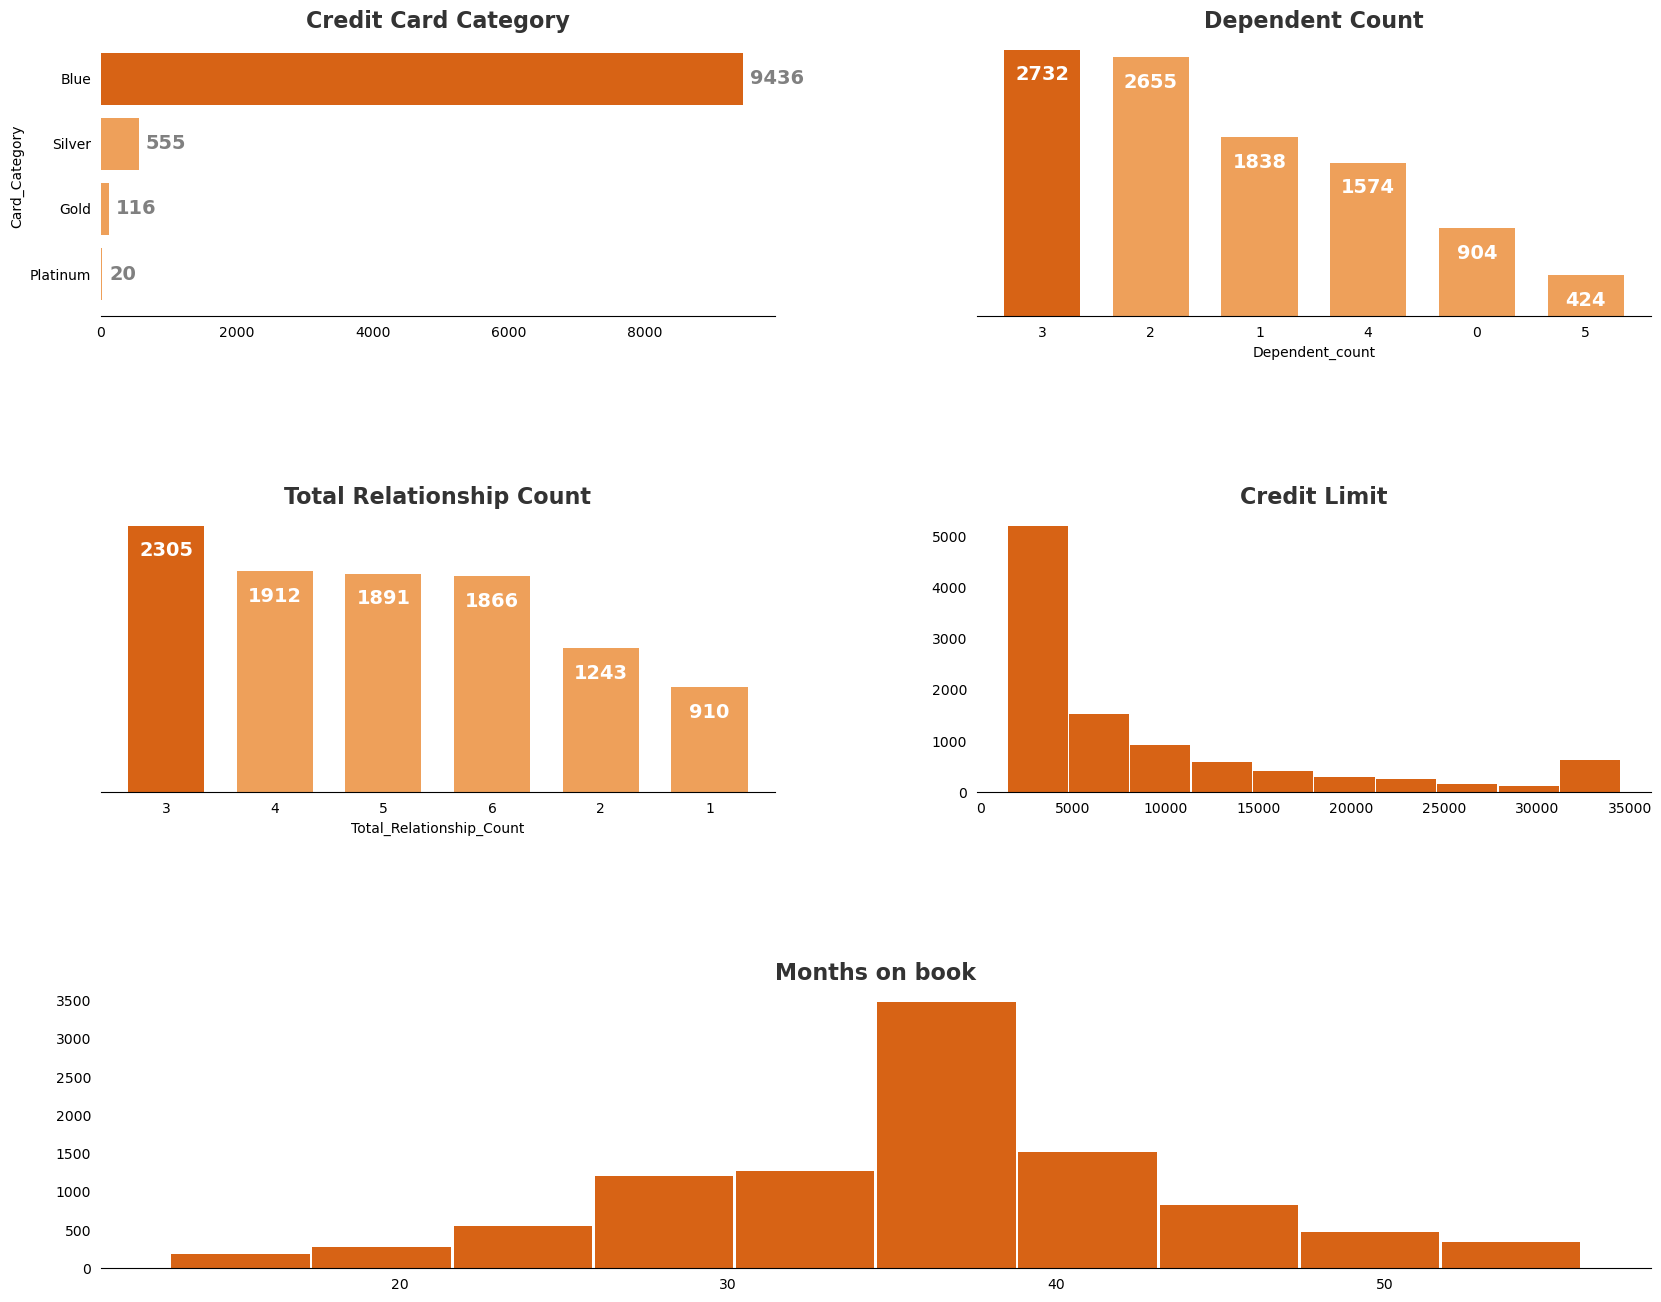

In [18]:
# Subplot 1 - Card Type
plt.figure(figsize=(20, 16))
plt.subplot2grid((3, 2),(0, 0))
ccg = (customer['Card_Category'].value_counts().sort_values(ascending = True)
       .plot(kind = 'barh', color = ['#EEA05A', '#EEA05A', '#EEA05A', '#D76315'], xlabel = '',  width = 0.8))


plt.title('Credit Card Category', size = 16, weight = 'bold', alpha = 0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)



rects = ccg.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    if x_value < 0:
        space *= -1
        ha = 'right'

    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha,
        color = 'gray',
        weight = 'bold',
            size = 14)  

# Subplot 2 - Dependent count
plt.subplot2grid((3, 2),(0, 1))
dcg = customer['Dependent_count'].value_counts().plot(kind = 'bar', rot = 0,  width = 0.7,
                                                     color = ['#D76315', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A'])
plt.title('Dependent Count', size = 16, alpha = 0.8, weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)
plt.yticks([])


for rect in dcg.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = -25
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    dcg.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'white',
        size = 14,
        weight = 'bold')                      


# Subplot 3 - # Services
plt.subplot2grid((3, 2),(1, 0))
trc = customer['Total_Relationship_Count'].value_counts().plot(kind = 'bar', rot = 0,  width = 0.7,
                                                     color = ['#D76315', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A', '#EEA05A'])
plt.title('Total Relationship Count', size = 16, alpha = 0.8, weight = 'bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)
plt.yticks([])


for rect in trc.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = -25
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    trc.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'white',
        size = 14,
        weight = 'bold')                      

# Subplot 4 - Credit Limit
plt.subplot2grid((3, 2),(1, 1))
customer['Credit_Limit'].hist( grid=False, color = '#D76315', rwidth = 0.98)

plt.title('Credit Limit', alpha = 0.8, size = 16, weight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)


# Subplot 5 - Months on the book
plt.subplot2grid((3, 2),(2, 0), colspan=2)
customer['Months_on_book'].hist( grid=False, color = '#D76315', rwidth = 0.98)

plt.title('Months on book', alpha = 0.8, size = 16, weight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)

plt.subplots_adjust(hspace=0.7, wspace=0.3)

plt.show()


## Bivariate Analysis

In [19]:
#creating the crosstab to do the plots
gender_crstab= pd.crosstab(customer['Gender'], customer['Attrition_Flag'])
educ_crstab = pd.crosstab(customer['Education_Level'], customer['Attrition_Flag'])
marital_crstab = pd.crosstab(customer['Marital_Status'], customer['Attrition_Flag'])
dependents_crstab = pd.crosstab(customer['Dependent_count'], customer['Attrition_Flag'])

print('Gender cross tab:')
print(gender_crstab)
print('-' * 60)
print('Education cross tab:')
print(educ_crstab)
print('-' * 60)



Gender cross tab:
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4428
M                             697               4072
------------------------------------------------------------
Education cross tab:
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                        154                859
Doctorate                       95                356
Graduate                       487               2641
High School                    306               1707
Post-Graduate                   92                424
Uneducated                     237               1250
Unknown                        256               1263
------------------------------------------------------------


In [20]:
print('Marital Status cross tab:')
print(marital_crstab)
print('-' * 60)
print('Dependent Count cross tab:')
print(dependents_crstab)

Marital Status cross tab:
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                      121                627
Married                       709               3978
Single                        668               3275
Unknown                       129                620
------------------------------------------------------------
Dependent Count cross tab:
Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                              135                769
1                              269               1569
2                              417               2238
3                              482               2250
4                              260               1314
5                               64                360


In [21]:
#swapping bar order
gender_crstab = gender_crstab[['Existing Customer', 'Attrited Customer']]
educ_crstab = educ_crstab[['Existing Customer', 'Attrited Customer']]
marital_crstab = marital_crstab[['Existing Customer', 'Attrited Customer']]
dependents_crstab = dependents_crstab[['Existing Customer', 'Attrited Customer']]

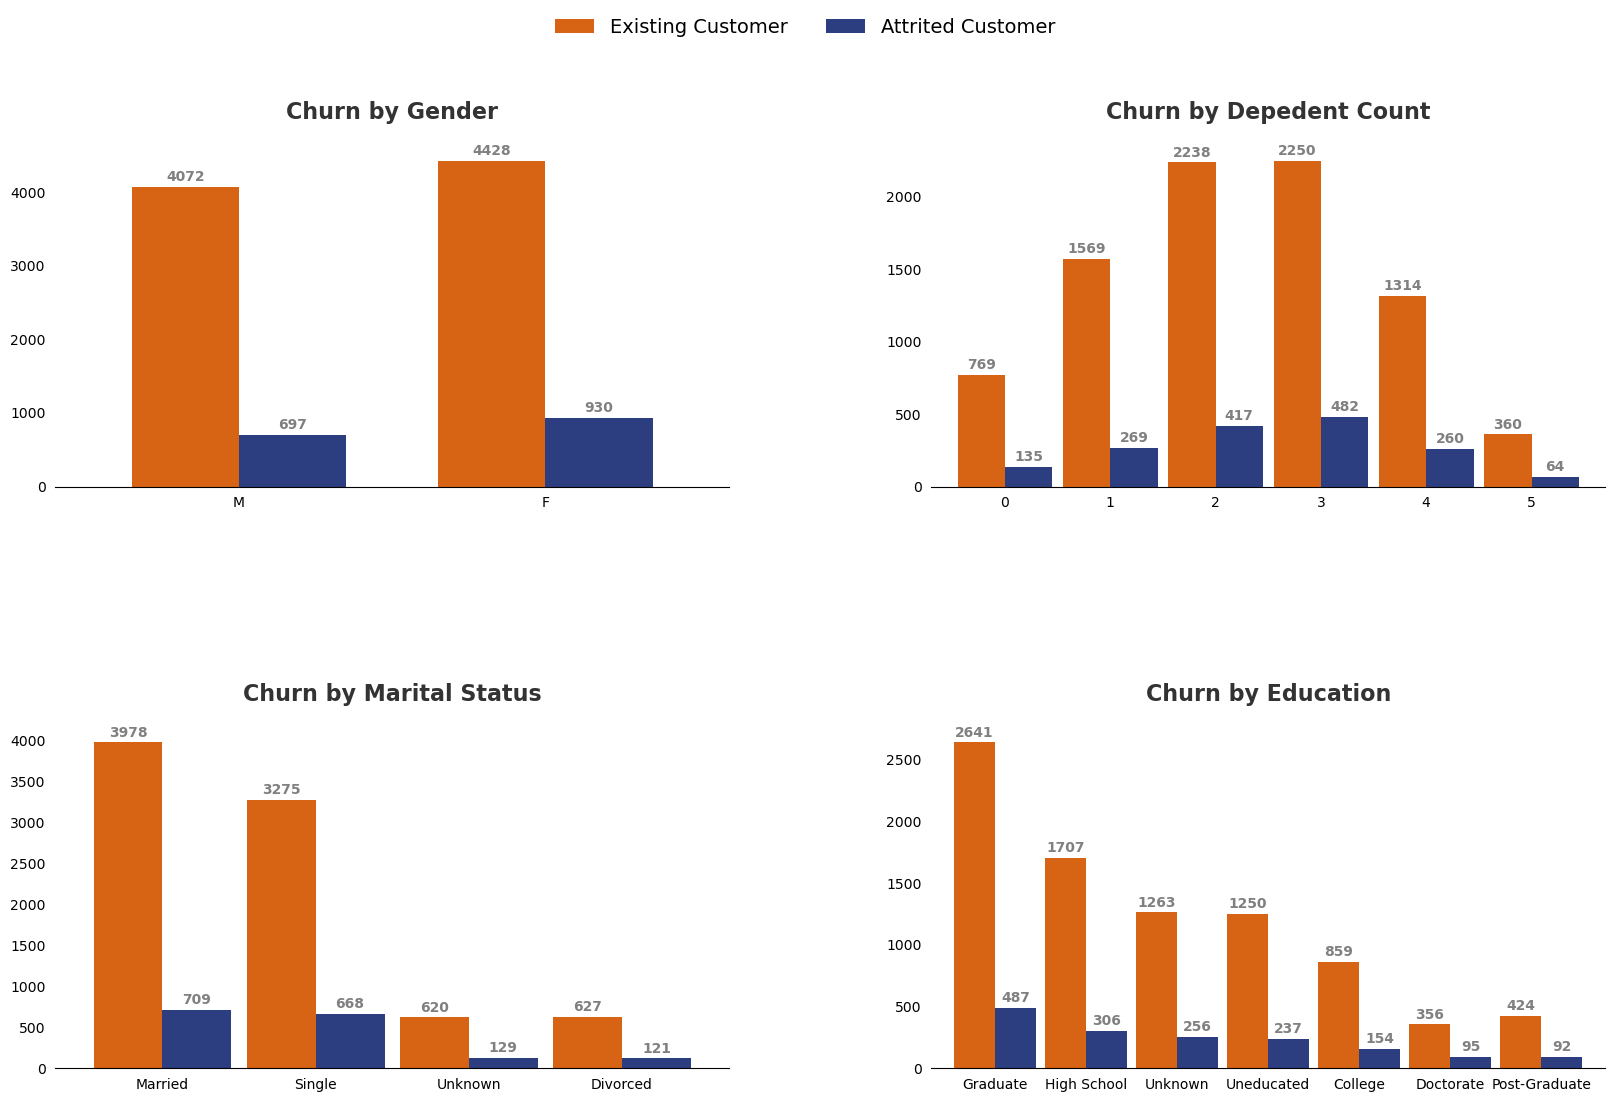

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

#Subplot 1: Gender
gender_crstab_plot = gender_crstab.sort_values(['Attrited Customer'], ascending= True).plot(kind='bar', rot = 0, width = 0.7, xlabel = '', color = ['#D76315','#2C3E7F'], legend = None, ax=axes[0, 0])
axes[0, 0].set_title('Churn by Gender', size = 16, alpha = 0.8, weight = 'bold', y=1.05)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)
axes[0, 0].spines['left'].set_visible(False)
axes[0, 0].tick_params(bottom = False, left = False)

for rect in gender_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    gender_crstab_plot.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'gray',
        size = 10,
        weight = 'bold')                      
    


#Subplot 2: Dependent Count
dependents_crstab_plot = dependents_crstab.plot(kind='bar', rot = 0, width = 0.9, xlabel = '', color = ['#D76315','#2C3E7F'], legend = None,ax=axes[0, 1])
axes[0, 1].set_title('Churn by Depedent Count', size = 16, alpha = 0.8, weight = 'bold',y=1.05)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
axes[0, 1].spines['left'].set_visible(False)
axes[0, 1].tick_params(bottom = False, left = False)

for rect in dependents_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    dependents_crstab_plot.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'gray',
        size = 10,
        weight = 'bold')   


#Subplot 3: Marital Status
marital_crstab_plot = marital_crstab.sort_values(['Attrited Customer'], ascending= False).plot(kind='bar', rot = 0, width = 0.9, xlabel = '',color = ['#D76315','#2C3E7F'], legend = None,ax=axes[1, 0])
axes[1, 0].set_title('Churn by Marital Status', size = 16, alpha = 0.8, weight = 'bold', y=1.05)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)
axes[1, 0].spines['left'].set_visible(False)
axes[1, 0].tick_params(bottom = False, left = False)


for rect in marital_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    marital_crstab_plot.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'gray',
        size = 10,
        weight = 'bold')   

#Subplot 4: Education Level
educ_crstab_plot = educ_crstab.sort_values(['Attrited Customer'], ascending= False).plot(kind='bar', rot = 0, width = 0.9, xlabel = '',color = [ '#D76315','#2C3E7F'],legend = None,ax=axes[1, 1])
axes[1, 1].set_title('Churn by Education', size = 16, alpha = 0.8, weight = 'bold', y=1.05)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)
axes[1, 1].spines['left'].set_visible(False)
axes[1, 1].tick_params(bottom = False, left = False)


for rect in educ_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    educ_crstab_plot.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va,
        color = 'gray',
        size = 10,
        weight = 'bold')   



plt.subplots_adjust(hspace=0.7, wspace=0.3)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2, frameon=False, fontsize = 14)
plt.show()


In [23]:
customer.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [24]:
card_crstab = pd.crosstab(customer['Card_Category'], customer['Attrition_Flag'])
relationship_crstab = pd.crosstab(customer['Total_Relationship_Count'], customer['Attrition_Flag'])
income_crstab = pd.crosstab(customer['Income_Category'], customer['Attrition_Flag'])

In [25]:
#swapping bar order
card_crstab = card_crstab[['Existing Customer', 'Attrited Customer']]
relationship_crstab = relationship_crstab[['Existing Customer', 'Attrited Customer']]
income_crstab = income_crstab[['Existing Customer', 'Attrited Customer']]

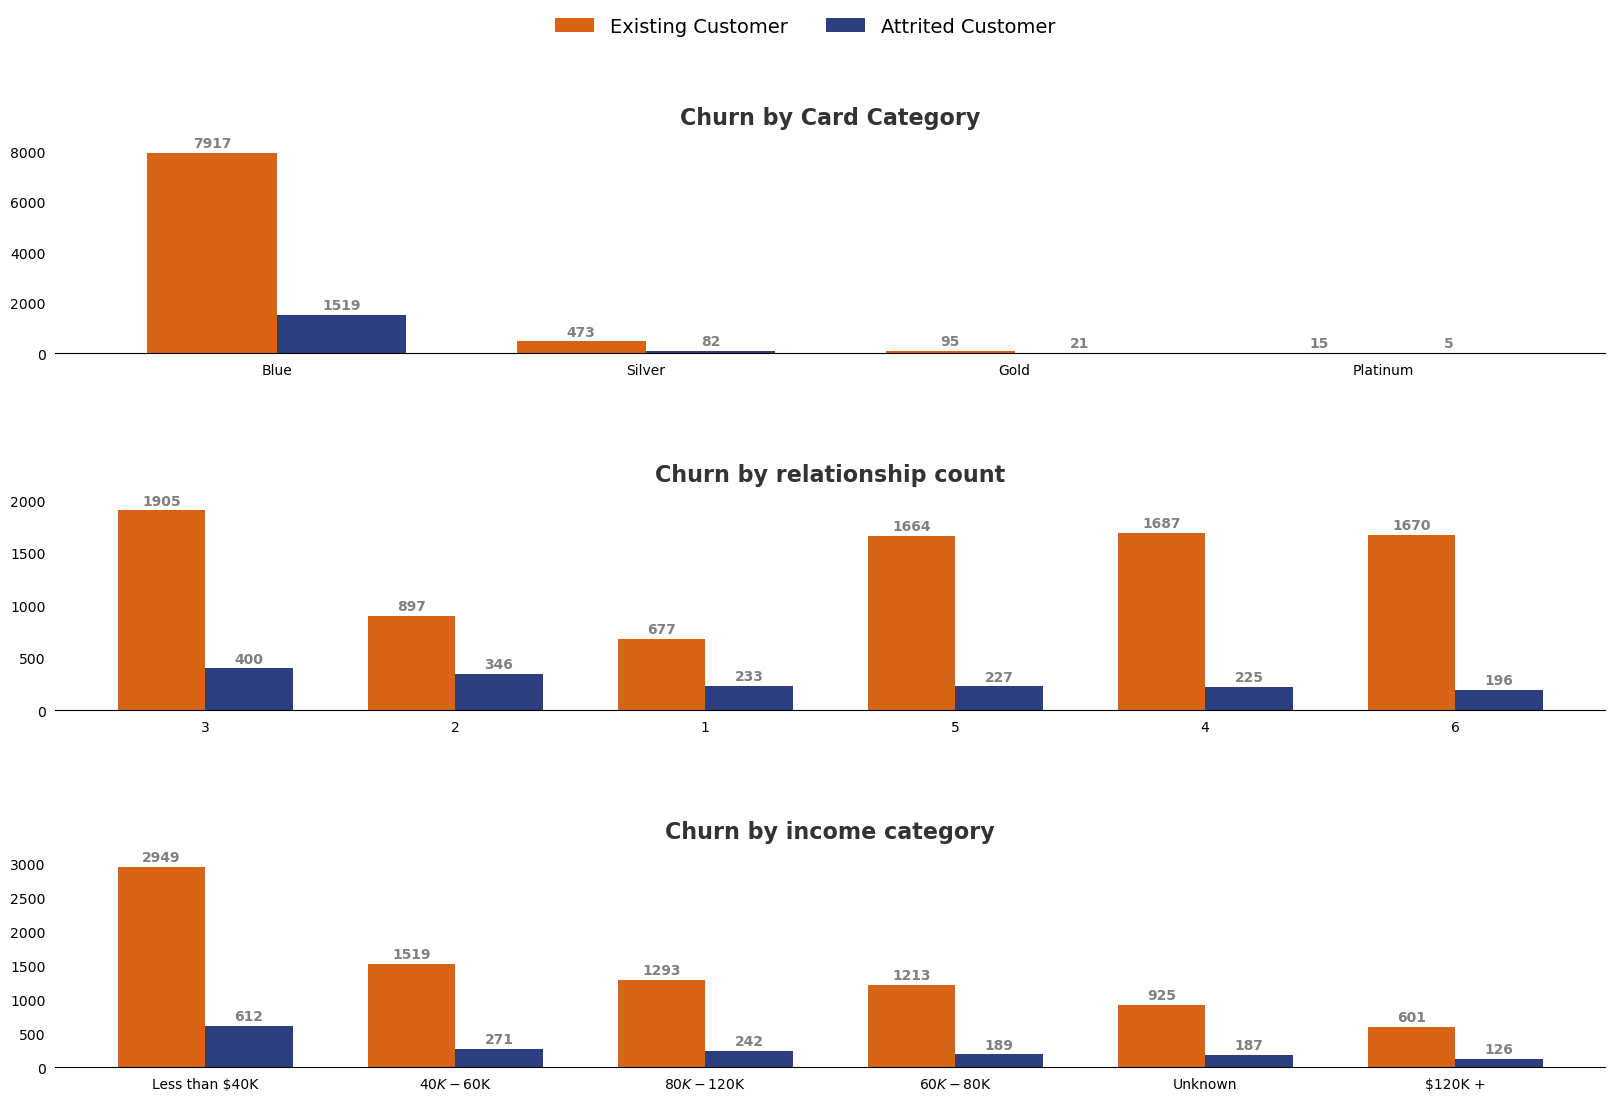

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(20, 12))
#Subplot 1: Churn by card category
card_crstab = card_crstab.sort_values(['Attrited Customer'], ascending=False)
card_crstab_plot = card_crstab.plot(kind='bar', rot=0, width=0.7, xlabel='', color=['#D76315', '#2C3E7F'], legend=None, ax=axes[0])
axes[0].set_title('Churn by Card Category', size=16, alpha=0.8, weight='bold', y=1.05)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].tick_params(bottom=False, left=False)

for rect in card_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    card_crstab_plot.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha='center',
        va=va,
        color='gray',
        size=10,
        weight='bold')


# Subplot 2: Churn by relationship count
relationship_crstab = relationship_crstab.sort_values(['Attrited Customer'], ascending=False)
relationship_crstab_plot = relationship_crstab.plot(kind='bar', rot=0, width=0.7, xlabel='', color=['#D76315', '#2C3E7F'], legend=None, ax=axes[1])
axes[1].set_title('Churn by relationship count', size=16, alpha=0.8, weight='bold', y=1.05)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].tick_params(bottom=False, left=False)

for rect in relationship_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    relationship_crstab_plot.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha='center',
        va=va,
        color='gray',
        size=10,
        weight='bold')

# Subplot 3: Churn by income category
income_crstab = income_crstab.sort_values(['Attrited Customer'], ascending=False)
income_crstab_plot = income_crstab.plot(kind='bar', rot=0, width=0.7, xlabel='', color=['#D76315', '#2C3E7F'], legend=None, ax=axes[2])
axes[2].set_title('Churn by income category', size=16, alpha=0.8, weight='bold', y=1.05)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_visible(False)
axes[2].tick_params(bottom=False, left=False)

for rect in income_crstab_plot.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 2
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.0f}".format(y_value)

    income_crstab_plot.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha='center',
        va=va,
        color='gray',
        size=10,
        weight='bold')

plt.subplots_adjust(hspace=0.7, wspace=0.3)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=2, frameon=False, fontsize = 14)


plt.show()


In [27]:
total_tran_churn = customer[['Total_Trans_Ct', 'Attrition_Flag']].groupby(['Total_Trans_Ct', 'Attrition_Flag']).size().reset_index(name='Count')
df_pivot_tran = total_tran_churn.pivot(index='Total_Trans_Ct', columns='Attrition_Flag', values='Count')


total_month_churn = customer[['Months_on_book', 'Attrition_Flag']].groupby(['Months_on_book', 'Attrition_Flag']).size().reset_index(name='Count')
df_pivot_month = total_month_churn.pivot(index='Months_on_book', columns='Attrition_Flag', values='Count')

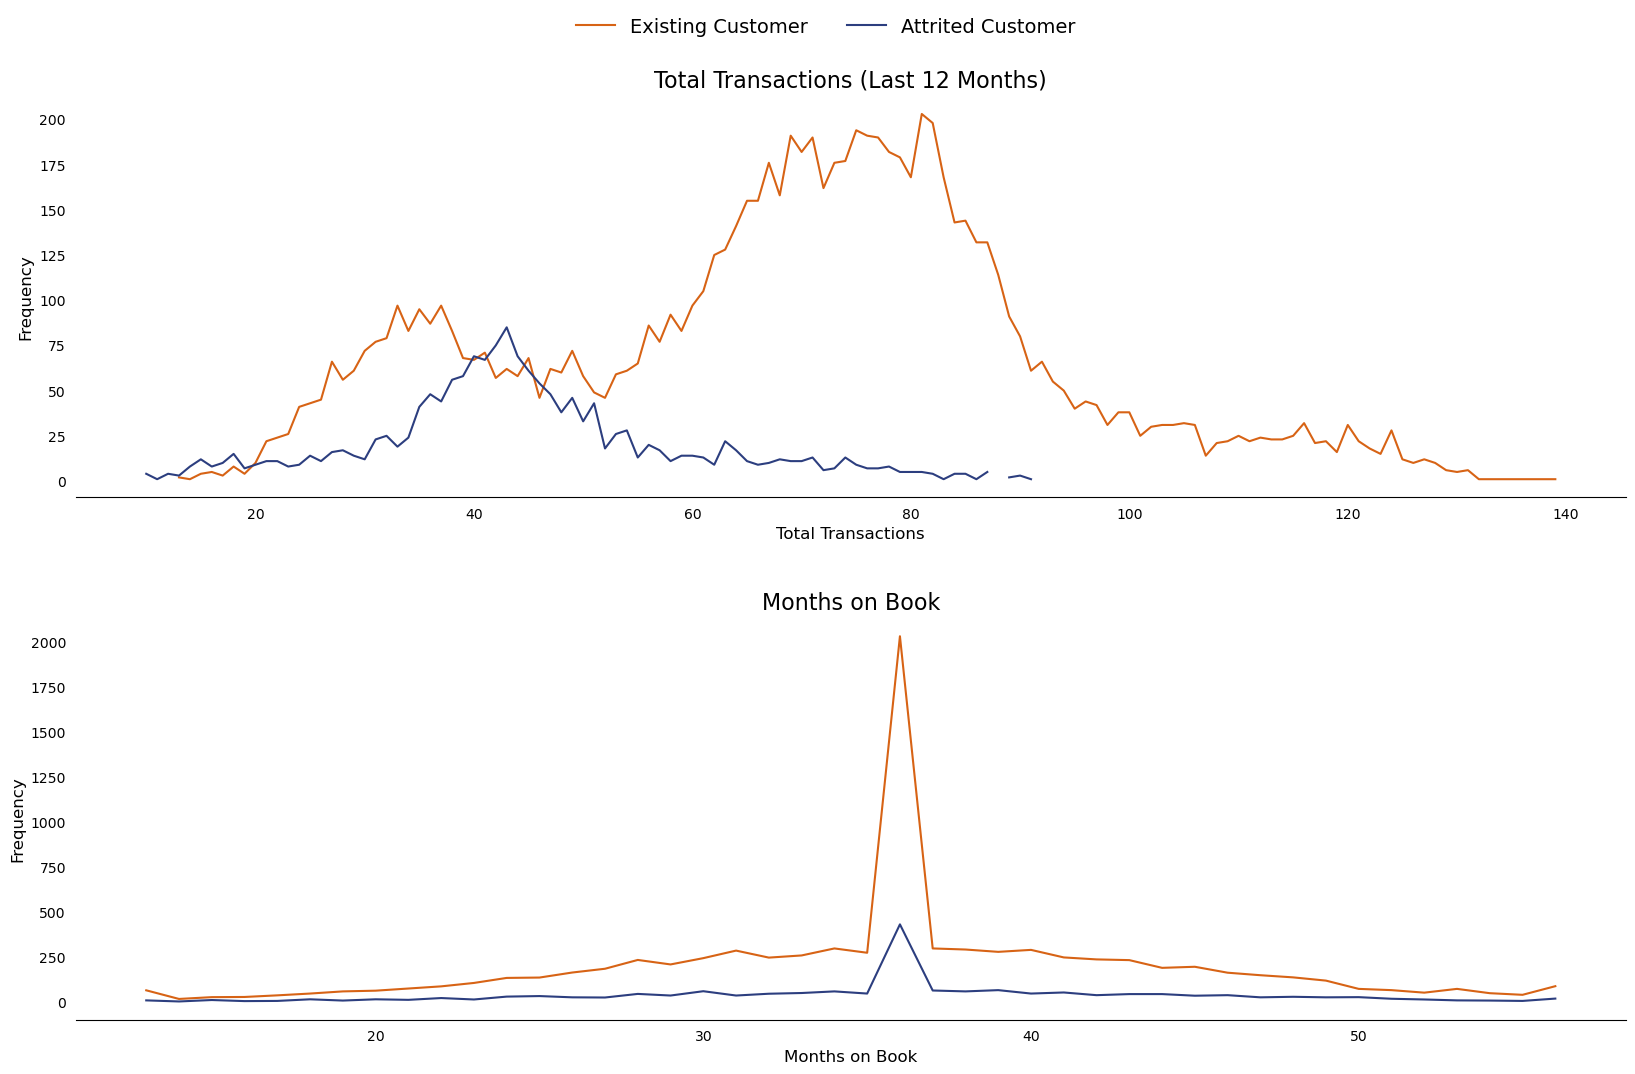

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Subplot 1:
plt.subplot(2, 1, 1)
plt.plot(df_pivot_tran.index, df_pivot_tran['Existing Customer'], color='#D76315', label='Existing Customer')
plt.plot(df_pivot_tran.index, df_pivot_tran['Attrited Customer'], color='#2C3E7F', label='Attrited Customer')
plt.title('Total Transactions (Last 12 Months)', fontsize=16)
plt.xlabel('Total Transactions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False, left=False)

# Subplot 2:
plt.subplot(2, 1, 2)
plt.plot(df_pivot_month.index, df_pivot_month['Existing Customer'], color='#D76315', label='Existing Customer')
plt.plot(df_pivot_month.index, df_pivot_month['Attrited Customer'], color='#2C3E7F', label='Attrited Customer')
plt.title('Months on Book', fontsize=16)
plt.xlabel('Months on Book', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(bottom=False, left=False)


plt.subplots_adjust(hspace=0.3, wspace=0.3)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=2, frameon=False, fontsize=14)
plt.show()


## Correlations

<AxesSubplot: >

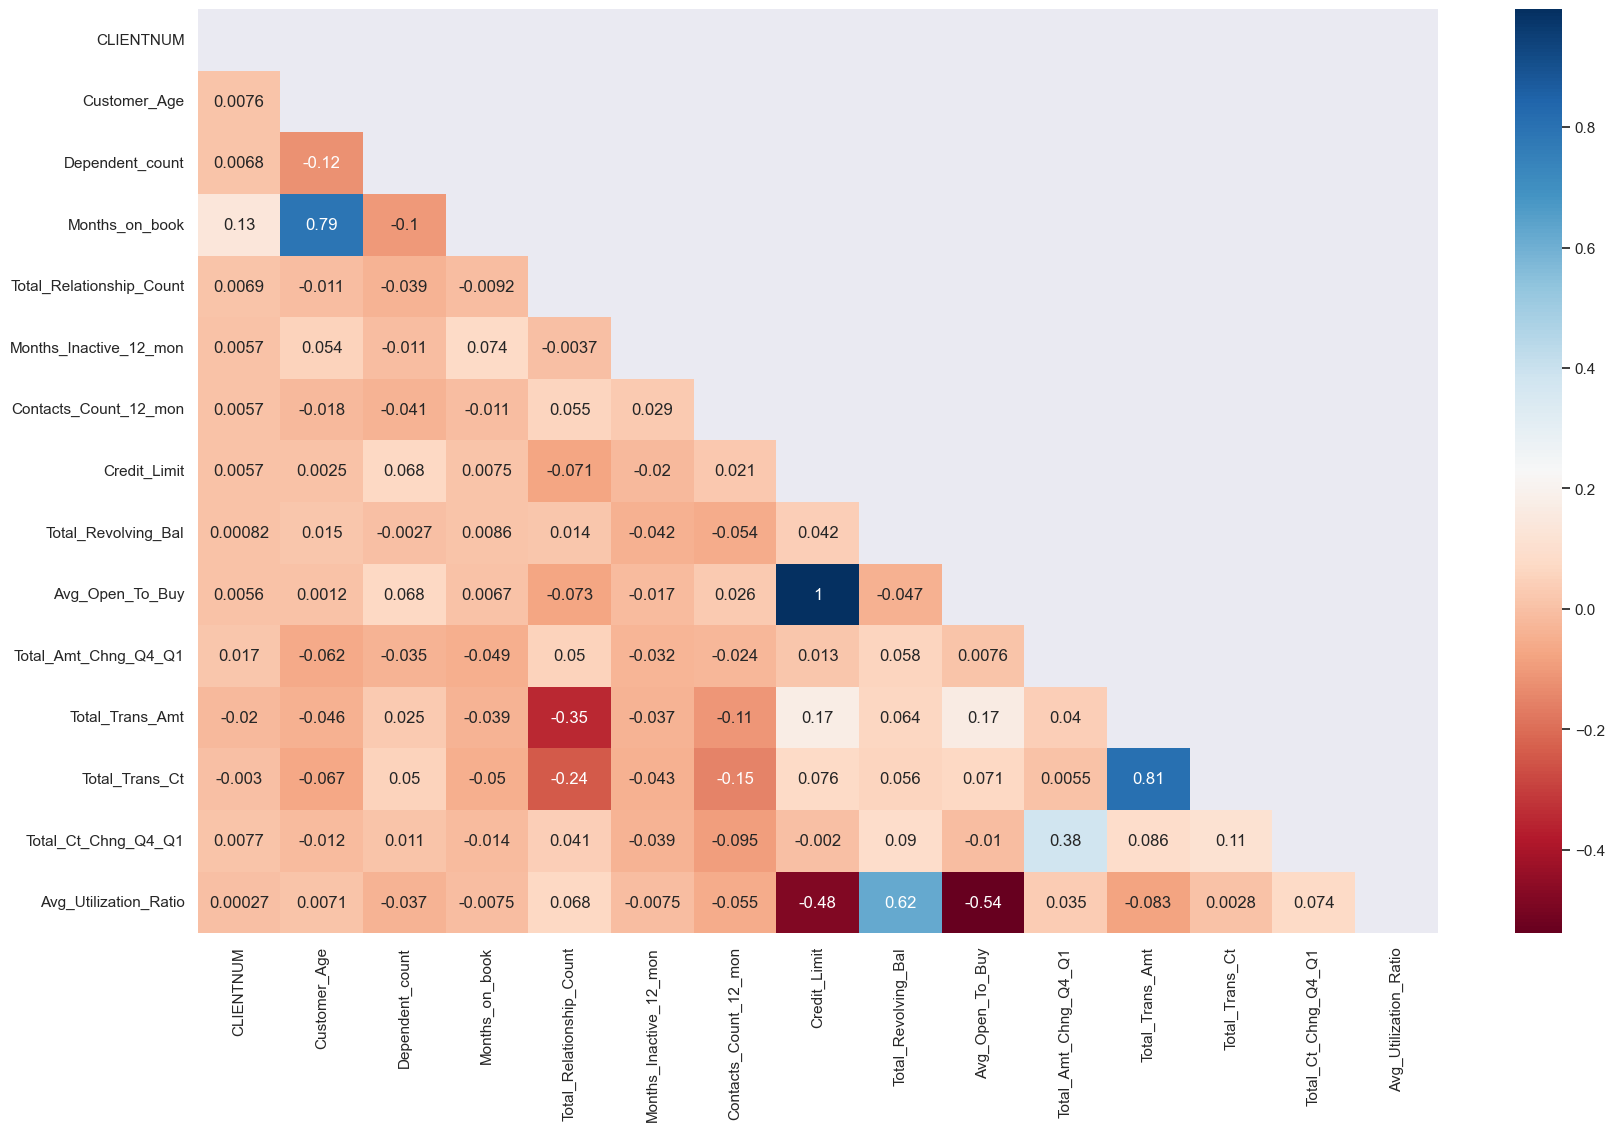

In [30]:
mask = np.triu(np.ones_like(customer.corr(numeric_only=True), dtype=bool))
sns.set(rc = {'figure.figsize':(20, 12)})
sns.heatmap(customer.corr(numeric_only=True), mask=mask, annot=True, cmap='RdBu')

Some notable correlations in this dataset are:
- Months on the book has a high correlation with customer age (0.79)
- Total relationship count has an inverse correlation with total transition amount and total transition count (-0.35 and -0.25, respectively)
- Average Open to Buy has a perfect correlation with Credit Limit.
- Credit Limit has an inverse correlation with Average Utilization Ratio (-0.48)
- Average Utilization Ratio has a positive correlation with Total Revolving Bal (0.62) but has an inverse correlation with Average Open to Buy (-0.54)

# Data Preparation

In this step, we will prepare the data for analysis and the machine learning process.
The project has two main goals:

    i. Construct a machine learning model capable of predicting which customers are likely to churn.
    
    ii. Use the predictions to perform a cluster analysis on customers who have the potential to churn, in order to understand their characteristics and approach them in a personalized manner.

The entire workflow is:

![Framewokr](pictures/framework.png)

In [31]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Class: To churn or to not churn

In [32]:
customer['Attrition_Flag'] = customer['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [33]:
customer.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


### Spliting the columns 

In [34]:
y_all = customer.loc[:, 'Attrition_Flag']
X_all = customer.drop('Attrition_Flag', axis = 1)

In [35]:
print(len(X_all))
print(len(y_all))
print(y_all.value_counts(normalize=True))

10127
10127
Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64


### Handling missing data

Although our basic data cleaning analysis didn't reveal any missing data, I found potentially hidden missing values labeled as 'Unknown' when analyzing the distributions of individual columns. To handle missing data, we can either drop it, develop a machine learning model to deal with it, or impute it with the mode for categorical data (our case). Dropping the data is not advisable due to information loss in our already small dataset, and developing a machine learning model is outside the project's scope. Therefore, I will impute missing data with the variable mode.

In [36]:
X_all['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [37]:
X_all[X_all['Marital_Status'] == 'Unknown'].head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
7,818906208,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
10,708790833,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
13,816082233,35,M,3,Graduate,Unknown,$60K - $80K,Blue,30,5,1,3,8547.0,1666,6881.0,1.163,1311,33,2.000,0.195
15,714885258,44,M,4,Unknown,Unknown,$80K - $120K,Blue,37,5,1,2,4234.0,972,3262.0,1.707,1348,27,1.700,0.230


In [38]:
X_all['Marital_Status'] = X_all['Marital_Status'].replace('Unknown', 'Married')

In [39]:
X_all['Marital_Status'].value_counts()

Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

In [40]:
X_all['Education_Level'].value_counts(normalize=True)

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

In [41]:
X_all['Education_Level'] = X_all['Education_Level'].replace('Unknown', 'Graduate')

In [42]:
X_all['Education_Level'].value_counts(normalize=True)

Education_Level
Graduate         0.458872
High School      0.198776
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

In [43]:
X_all['Income_Category'].value_counts(normalize=True)

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: proportion, dtype: float64

In [44]:
X_all['Income_Category'] = X_all['Income_Category'].replace('Unknown', 'Less than $40K')

In [45]:
X_all['Income_Category'].value_counts(normalize=True)

Income_Category
Less than $40K    0.461440
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
$120K +           0.071788
Name: proportion, dtype: float64

### Categorical Encoding

In this dataset, we have a series of categorical data. However, some machine learning algorithms do not perform well with categorical data, which is why it is necessary to convert them into numeric data. One of the most popular methods for doing this is by applying a process called One Hot Encoding, where we create dummy variables with values of 0 or 1 to represent the categorical variables.

I chose to use One Hot Encoding as the only method to transform the variables (instead of applying Label Encoding to some other variables) because I intend to work with clustering algorithms later on, and they tend to perform better with this type of encoding. Additionally, I dropped the first dummy variable to avoid multicollinearity in the data, which can impact the performance of the machine learning model.

In [46]:
X_all.head(10)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,51,M,4,Graduate,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,32,M,0,High School,Married,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [47]:
X_all.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [48]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='first'),
     ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']),
    remainder='passthrough'
)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Define X and y
X = customer.drop('Attrition_Flag', axis=1)  # All features
y = customer['Attrition_Flag']  # Target variable

# Step 2: Encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluate
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84106614017769

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2543
           1       1.00      0.03      0.05       496

    accuracy                           0.84      3039
   macro avg       0.92      0.51      0.48      3039
weighted avg       0.87      0.84      0.77      3039



In [58]:
# After encoding
transformed_df = pd.get_dummies(customer, drop_first=True)

# Then use it
X = transformed_df.drop(['Attrition_Flag', 'CLIENTNUM'], axis=1)
y = transformed_df['Attrition_Flag']

In [59]:
transformed_df = transformed_df.rename(columns = {'onehotencoder__x0_M' : 'Gender_M',
                                                  'onehotencoder__x1_Doctorate': 'Education_Level_Doctorate',
                                                  'onehotencoder__x1_Graduate': 'Education_Level_Graduate',
                                                  'onehotencoder__x1_High School': 'Educational_Level_High_School',
                                                  'onehotencoder__x1_Post-Graduate': 'Educational_Level_Post_Graduate',
                                                  'onehotencoder__x1_Uneducated': 'Educational_Level_Uneducated',
                                                  'onehotencoder__x2_Married': 'Marital_Status_Married',
                                                  'onehotencoder__x2_Single': 'Marital_Status_Single',
                                                  'onehotencoder__x3_$40K - $60K': 'Income_40k_60k',
                                                  'onehotencoder__x3_$60K - $80K': 'Income_60k_80k',
                                                  'onehotencoder__x3_$80K - $120K': 'Income_80k_120k',
                                                  'onehotencoder__x3_Less than $40K':'Income_Less_than_40k',
                                                  'onehotencoder__x4_Gold': 'Card_Type_Gold',
                                                  'onehotencoder__x4_Platinum': 'Card_Type_Platinum',
                                                  'onehotencoder__x4_Silver': 'Card_Type_Silver'
                                                  })

### Splitting the data

In [62]:
from sklearn.preprocessing import StandardScaler

# After encoding and splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict with scaled test data
y_pred = model.predict(X_test_scaled)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8101, 32)
(8101,)
(2026, 32)
(2026,)


### Scaling
I employed the MinMaxScaler as the normalization technique in my data preprocessing pipeline. This step is crucial for optimizing the algorithm's runtime and mitigating issues such as overshooting.

In [65]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [68]:
mask = ~pd.isna(y_train)
X_train = X_train[mask]
y_train = y_train[mask]


In [69]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1)).ravel()
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1)).ravel()

In [70]:
# y_train_array = y_train.values.ravel()
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# y_train_scaled = scaler.fit_transform(y_train_array.reshape(-1, 1)).ravel()

# Churn Prediction

### Model Selection

I utilized multiple machine-learning classifiers to predict the churn status of customers. The selected classifiers were Logistic Regression (used as a baseline), Decision Tree, Random Forest, and XGBoost. As the dataset was imbalanced, I applied the Synthetic Minority Over-sampling Technique (SMOTE) to the training set to address this issue and improve the performance of the classifiers.

To assess the performance of the models, I employed cross-validation with 5 folds. This involved dividing the original data into different folds for training and testing purposes. The training set was used for model training, while the test set was used for evaluating the performance of the models.

In order to evaluate the performance of the classifiers, I measured accuracy, precision, recall, and F1-scores. However, I considered recall as the main metric for assessing the models. Recall is a vital metric as it represents the proportion of positive examples that are predicted correctly. It is particularly important in imbalanced datasets where accurately predicting positive instances (such as churned customers) is critical for decision-making and business impact.

In [71]:

def cross_validation(model, X, y, oversampling=False):
    # Scikit-learn K-Fold
    kfold = StratifiedKFold(n_splits=5)

    fold_accuracies = []
    fold_precisions = []
    fold_recalls = []
    fold_f1s = []
    

    for idx, (idx_train, idx_validation) in enumerate(kfold.split(X, y)):
        X_train_split = X[idx_train, :]
        y_train_split = y[idx_train]

        if oversampling:
            sm = SMOTE(random_state=42)
            X_train_split, y_train_split = sm.fit_resample(X_train_split, y_train_split)

        model.fit(X_train_split, y_train_split)

        X_validation_split = X[idx_validation, :]
        y_validation_split = y[idx_validation]

        predictions = model.predict(X_validation_split)

        fold_accuracy = accuracy_score(y_validation_split, predictions)
        fold_precision = precision_score(y_validation_split, predictions)
        fold_recall = recall_score(y_validation_split, predictions)
        fold_f1 = f1_score(y_validation_split, predictions)

        fold_accuracies.append(fold_accuracy)
        fold_precisions.append(fold_precision)
        fold_recalls.append(fold_recall)
        fold_f1s.append(fold_f1)
    

    print(f'Overall accuracy: {np.mean(fold_accuracies)}')
    print(f'Overall precision: {np.mean(fold_precisions)}')
    print(f'Overall recall: {np.mean(fold_recalls)}')
    print(f'Overall F1-score: {np.mean(fold_f1s)}')
    
    return fold_accuracies, fold_precisions, fold_recalls, fold_f1s



In [72]:
models = [LogisticRegression(),  DecisionTreeClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]

for model in models:
    print(f'Cross-validation for {type(model).__name__}:')
    cross_validation(model, X_train_scaled, y_train_scaled)
    print('------------------------------------------------------------')


Cross-validation for LogisticRegression:
Overall accuracy: 0.9056905887997807
Overall precision: 0.8059905387978785
Overall recall: 0.5430769230769231
Overall F1-score: 0.6485528286512974
------------------------------------------------------------
Cross-validation for DecisionTreeClassifier:
Overall accuracy: 0.934083289540826
Overall precision: 0.7941682831914828
Overall recall: 0.796923076923077
Overall F1-score: 0.7954070026063896
------------------------------------------------------------
Cross-validation for RandomForestClassifier:
Overall accuracy: 0.955191278055765
Overall precision: 0.9296003298075919
Overall recall: 0.7799999999999999
Overall F1-score: 0.8480885531127942
------------------------------------------------------------
Cross-validation for XGBClassifier:
Overall accuracy: 0.9724726392030526
Overall precision: 0.936926873904618
Overall recall: 0.8892307692307693
Overall F1-score: 0.9120207000753939
------------------------------------------------------------


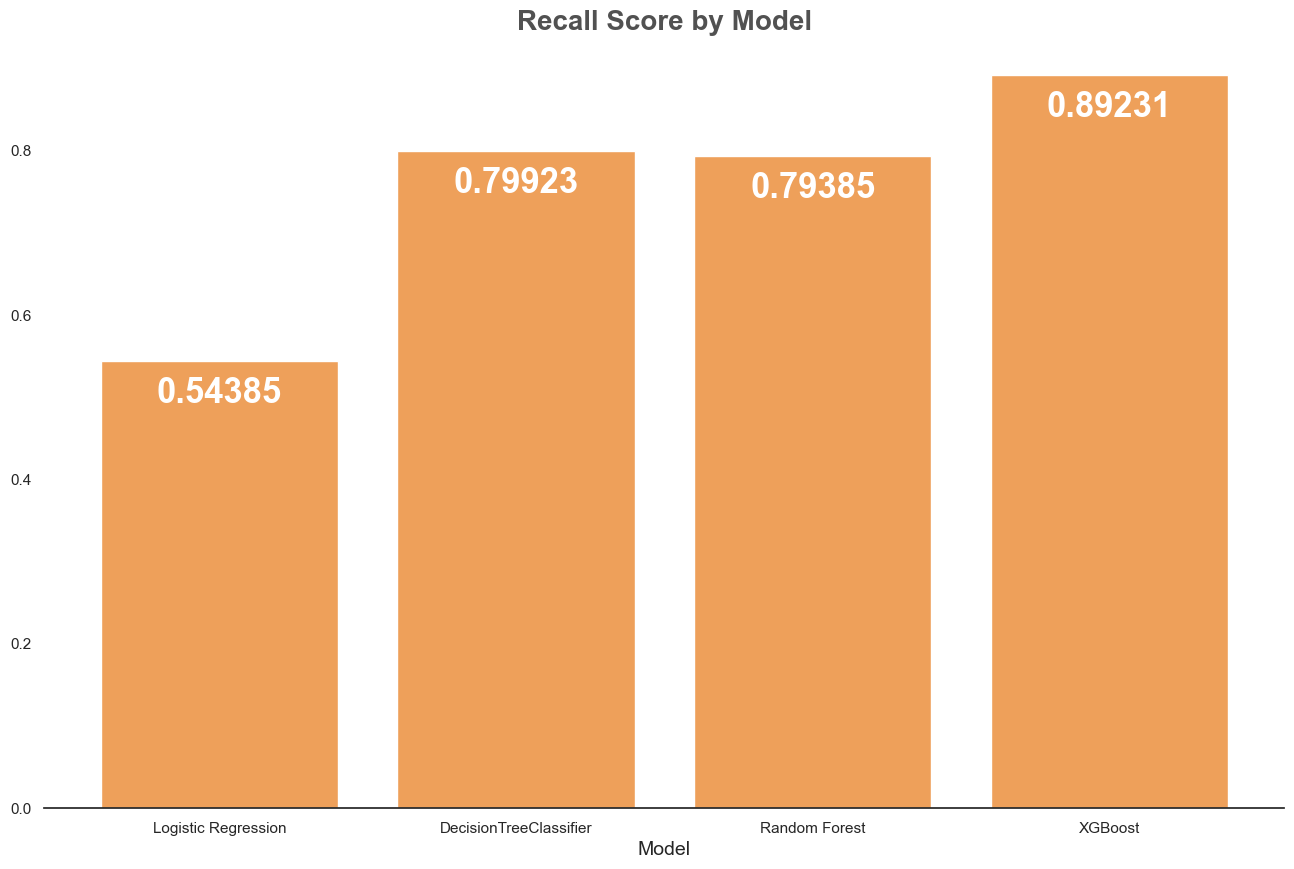

In [73]:
# List of models and their respective Recall scores
models = ['Logistic Regression', 'DecisionTreeClassifier', 'Random Forest', 'XGBoost']
recall_scores = [0.5438461538461539,0.7992307692307692, 0.7938461538461539, 0.8923076923076924]

# Create the bar chart
sns.set_style("white")
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(models, recall_scores, color='#EEA05A')

# Add labels to axes and the chart
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_title('Recall Score by Model', size=20, weight='bold', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False, left=False)
sns.set_style("white")

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = -35
    va = 'bottom'

    if y_value < 0:
        space *= -1
        va = 'top'

    label = "{:.5f}".format(y_value)

    ax.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords="offset points",
        ha='center',
        va=va,
        color='white',
        size=25,
        weight='bold')

# Show the chart
plt.show()



## Hyperparameter Tuning

After comparing the performance of multiple machine-learning classifiers, I selected XGBoost as the best model based on its higher recall score. However, I wanted to further improve its performance, so I used grid search to tune its hyperparameters. After several iterations, I found the optimal combination of hyperparameters that resulted in the best recall score. Specifically, I adjusted the learning rate, maximum depth, and number of estimators. The final hyperparameter values were determined to be a learning rate of 0.3, maximum depth of 6, and 100 estimators. These parameters were selected after careful consideration and validation to ensure they resulted in the best possible performance of the model.

In [74]:
grid_params = {
    
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.2, 0.3, 0.5],
    'max_depth': [3, 5, 6]
    }

print(grid_params)

{'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.2, 0.3, 0.5], 'max_depth': [3, 5, 6]}


In [78]:
accuracy_lst_xgb = []
precision_lst_xgb = []
recall_lst_xgb = []
f1_lst_xgb = []
auc_lst_xgb = []


# Set error_score to raise in RandomizedSearchCV
xgb_grid = RandomizedSearchCV(xgb.XGBClassifier(), grid_params, random_state=42)

start = time.time()
count = 0

# Start the loop for cross-validation
for train, test in StratifiedKFold().split(X_train_scaled, y_train_scaled):
    
    # Define the imbalanced pipeline with SMOTETomek and the random forest model
    pipeline_xgb = imbalanced_make_pipeline(SMOTE(), xgb_grid)
    
    
    # Fit the pipeline to the training data
    model_xgb = pipeline_xgb.fit(X_train_scaled[train], y_train_scaled[train])
        
    # Select the best estimator from RandomizedSearchCV
    best_est_xgb = xgb_grid.best_estimator_
    
    # Make predictions on the test set
    prediction_xgb = best_est_xgb.predict(X_train_scaled[test])
    
    # Append the evaluation metrics to their respective lists
    accuracy_lst_xgb.append(pipeline_xgb.score(X_train_scaled[test], y_train_scaled[test]))
    precision_lst_xgb.append(precision_score(y_train_scaled[test], prediction_xgb))
    recall_lst_xgb.append(recall_score(y_train_scaled[test], prediction_xgb))
    f1_lst_xgb.append(f1_score(y_train_scaled[test], prediction_xgb))
    auc_lst_xgb.append(roc_auc_score(y_train_scaled[test], prediction_xgb))
    
    count = count + 1
    print(f"kfold nº: {count}")
    
    # Print the current fold number and the intermediate time
    intervalo = time.time()
    print(f"Intermediate time: {(intervalo - start)/60:.1f} minutes")
    print()
    
    # Print the best hyperparameters for the random forest model

print('---' * 20)
print(f"Best estimators for XGB: {xgb_grid.best_params_}")

# Print the mean of the evaluation metrics across all folds
print('---' * 20)
print('Results')
print(f"Accuracy:  {np.mean(accuracy_lst_xgb)}")
print(f"Precision: {np.mean(precision_lst_xgb)}")
print(f"Recall:    {np.mean(recall_lst_xgb)}")
print(f"F1:        {np.mean(f1_lst_xgb)}")
print(f"AUC:       {np.mean(auc_lst_xgb)}")
print('---' * 20)

# printing the total time of cross-validation

end = time.time()
print(f"Time of the loop for cross-validation: {(end - start)/60:.1f} minutes")

kfold nº: 1
Intermediate time: 0.2 minutes

kfold nº: 2
Intermediate time: 0.3 minutes

kfold nº: 3
Intermediate time: 0.5 minutes

kfold nº: 4
Intermediate time: 0.6 minutes

kfold nº: 5
Intermediate time: 0.8 minutes

------------------------------------------------------------
Best estimators for XGB: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.2}
------------------------------------------------------------
Results
Accuracy:  0.969386143289084
Precision: 0.9071904043137801
Recall:    0.9015384615384615
F1:        0.9042413960115188
AUC:       0.9419471600599773
------------------------------------------------------------
Time of the loop for cross-validation: 0.8 minutes


## Final Model

Here I train the model and predict which customers are going to churn and which ones are not. Additionally, I used feature importance to identify the parameters that had the most significant impact on the model's prediction. This analysis helped me understand which factors played a crucial role in predicting customer churn.

In [79]:
best_estimator_xgb = xgb_grid.best_estimator_

pipeline_xgb = imbalanced_make_pipeline(SMOTE(), best_estimator_xgb)

model = pipeline_xgb.fit(X_train_scaled, y_train_scaled)


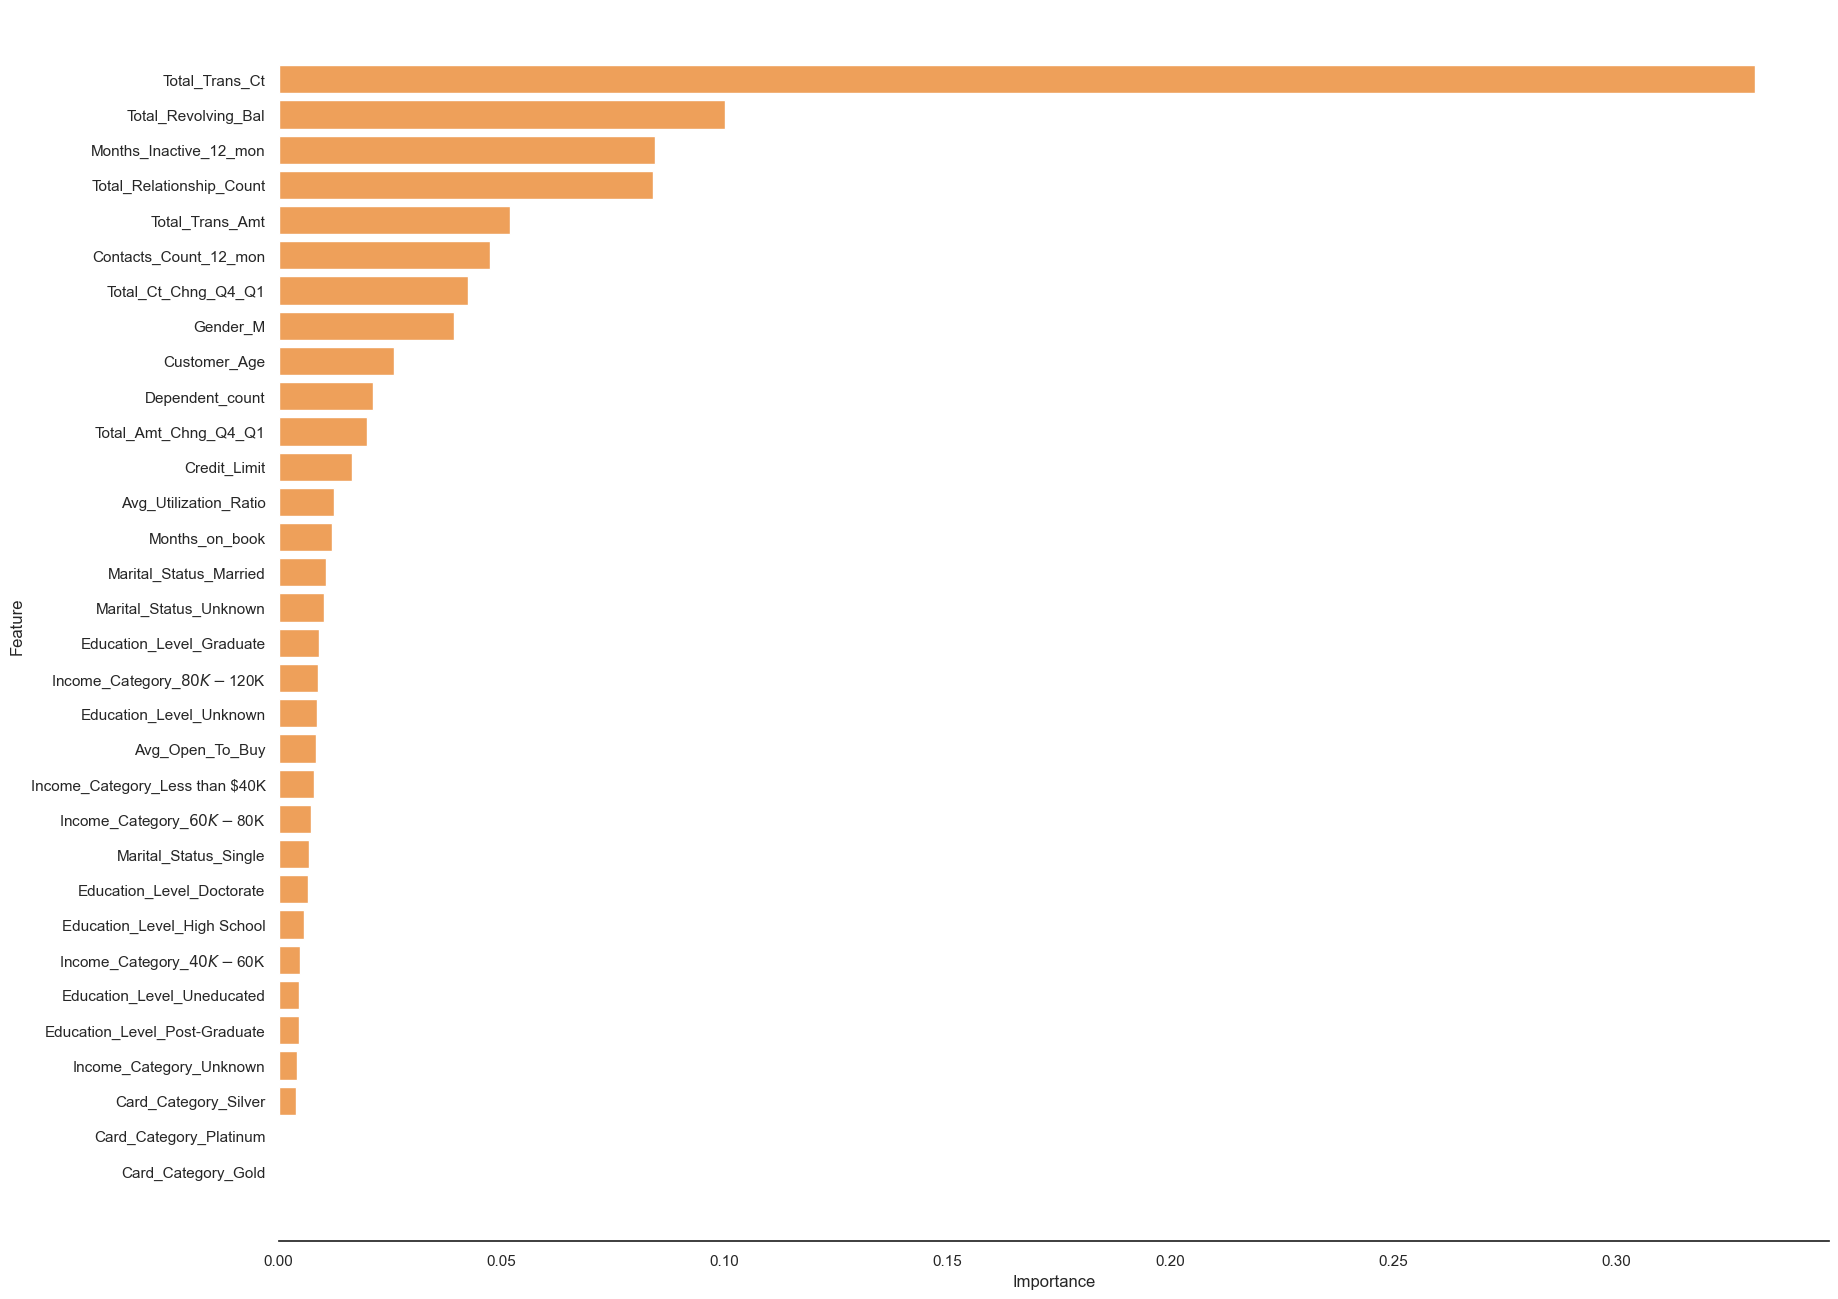

In [80]:
importances = best_estimator_xgb.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [features[i] for i in indices]

# Create horizontal bar plot
plt.figure(figsize=(20, 16))
sns.set_style("white")
plt.barh(range(X_train.shape[1]), importances[indices], color='#EEA05A')
plt.yticks(range(X_train.shape[1]), names)
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(bottom = False, left = False)
plt.show()

#### Predicting

In [81]:
# Make predictions on the test set
prediction_xgb = model_xgb.predict(X_test_scaled)

# Evaluate the performance of the model on the test set
accuracy_xgb = pipeline_xgb.score(X_test_scaled, y_test_scaled)
precision_xgb = precision_score(y_test_scaled, prediction_xgb)
recall_xgb = recall_score(y_test_scaled, prediction_xgb)
f1_xgb = f1_score(y_test_scaled, prediction_xgb)
auc_xgb = roc_auc_score(y_test_scaled, prediction_xgb)

# Print the evaluation metrics
print('---' * 20)
print('Final Results')
print(f"Accuracy:  {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall:    {recall_xgb}")
print(f"F1:        {f1_xgb}")
print(f"AUC:       {auc_xgb}")
print('---' * 20)

------------------------------------------------------------
Final Results
Accuracy:  0.9629812438302073
Precision: 0.8888888888888888
Recall:    0.8807339449541285
F1:        0.8847926267281107
AUC:       0.9297725051433385
------------------------------------------------------------


In [82]:
# converter o numpy.ndarray em um pandas DataFrame
df_prediction = pd.DataFrame(prediction_xgb, columns=['Prediction'])
# adicionar o índice
df_prediction.index = range(1, len(df_prediction) + 1)
# exibir o DataFrame da predição
print(df_prediction)



      Prediction
1              0
2              0
3              0
4              0
5              0
...          ...
2022           0
2023           1
2024           0
2025           0
2026           0

[2026 rows x 1 columns]


In [83]:
# Create a DataFrame with the original columns of the test set
prediction_df = pd.DataFrame(X_test, columns=transformed_df.columns)

# Add the predicted values as a new column
prediction_df['prediction'] = prediction_xgb

# Print the resulting DataFrame
prediction_df.head()



,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,prediction
3781,NaN,NaN,48,3,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,0
2922,NaN,NaN,59,1,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,0
5070,NaN,NaN,37,2,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0
7246,NaN,NaN,47,3,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0
623,NaN,NaN,42,3,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,0


In [84]:
prediction_df['prediction'].value_counts(normalize=True)

prediction
0    0.840079
1    0.159921
Name: proportion, dtype: float64

In [85]:
customer['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.83934
1    0.16066
Name: proportion, dtype: float64

# Customer Segmentation

In order to perform churn management, I conducted customer segmentation on the churn data. K-Means was used to cluster the customers, and the elbow technique was applied to decide the appropriate number of clusters to use. It's worth noting that the customer segmentation was only conducted on the churn data as it aligns with the project's objectives.

After the customer segmentation, I analyzed customer behavior based on the results of churn prediction and segmentation. This analysis provides valuable insights into customer behavior and can be used to optimize the customer retention strategy.

In [86]:
#custumers predicted to churn
churn_df = prediction_df[prediction_df['prediction'] == 1]


In [87]:
print(f'Database with all predictions:',prediction_df.shape)
print(f'Database with only the customer predicted to churn:',churn_df.shape)

Database with all predictions: (2026, 35)
Database with only the customer predicted to churn: (324, 35)


In [88]:
#preparing the dataset
churn_std = churn_df.copy()
churn_std.reset_index(inplace=True)
customer_df = customer.copy()
customer_df.reset_index(inplace=True)

In [89]:
X_churn = churn_df.div(churn_df.sum(axis=1), axis='rows')
X_churn.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,prediction
3994,NaN,NaN,0.000922,0.000077,0.000615,0.000096,0.000038,0.000058,0.483932,0.0,0.483932,0.000009,0.029451,0.000788,0.000006,0.0,0.000019,0.0,0.0,0.0,0.0,0.0,0.0,0.000019,0.0,0.0,0.0,0.0,0.000019,0.0,0.0,0.0,0.0,0.0,0.000019
5137,NaN,NaN,0.007673,0.0005,0.006505,0.0005,0.0005,0.0,0.300414,0.05271,0.247704,0.000082,0.375642,0.007006,0.000067,0.000029,0.0,0.0,0.0,0.000167,0.0,0.0,0.0,0.000167,0.0,0.0,0.0,0.0,0.0,0.000167,0.0,0.0,0.0,0.0,0.000167
303,NaN,NaN,0.000681,0.000057,0.000468,0.000028,0.000028,0.000043,0.489504,0.029229,0.460275,0.00001,0.019146,0.000454,0.000006,0.000001,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.000014,0.0,0.0,0.0,0.000014,0.0,0.0,0.0,0.000014,0.0,0.0,0.000014


### Cluster

In [95]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Select ONLY numeric columns
X_numeric = customer.select_dtypes(include=[np.number])

# Step 2: Drop ID column (not useful for clustering)
X_numeric = X_numeric.drop('CLIENTNUM', axis=1, errors='ignore')

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numeric)

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_imputed)

# Get results
labels = kmeans.labels_
print("Cluster labels:", labels)

Cluster labels: [2 0 0 ... 0 0 2]


Any NaN values? False
X_churn shape: (10127, 15)


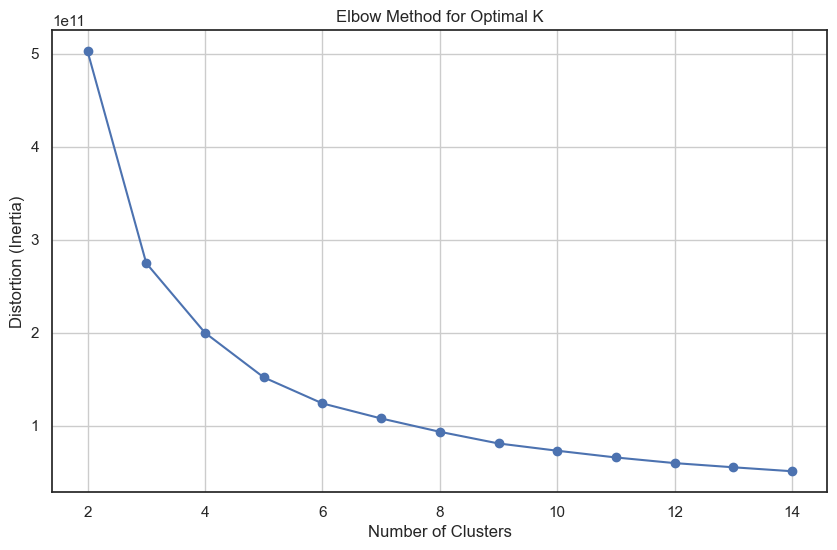

In [100]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Prepare X_churn - select only numeric columns
X_churn = customer.select_dtypes(include=[np.number])

# Step 2: Drop ID column
X_churn = X_churn.drop('CLIENTNUM', axis=1, errors='ignore')

# Step 3: Handle missing values - CRITICAL STEP
X_churn = X_churn.fillna(X_churn.median())

# OR use SimpleImputer
# imputer = SimpleImputer(strategy='median')
# X_churn = imputer.fit_transform(X_churn)

# Step 4: Verify no NaN values remain
print("Any NaN values?", X_churn.isnull().any().any())
print("X_churn shape:", X_churn.shape)

# Step 5: Calculate distortions
distortion = []
n_cluster = range(2, 15)

for n_clus in n_cluster:
    distortion.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=42).fit(X_churn).inertia_)

# Step 6: Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(n_cluster, distortion, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [101]:
distortion = []
n_cluster = range(2, 15)
for n_clus in n_cluster:
    distortion.append(KMeans(n_clusters=n_clus, max_iter=10_000, n_init=100, random_state=42).fit(X_churn).inertia_)

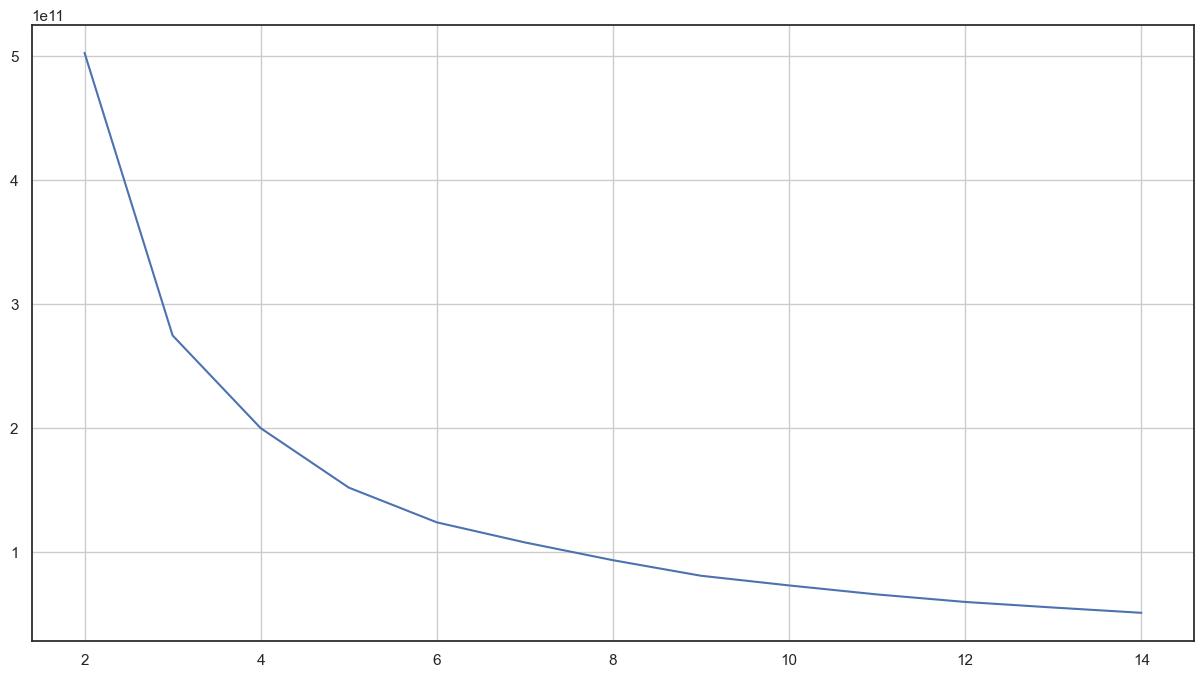

In [102]:
plt.figure(figsize=(15,8))
plt.plot(n_cluster, distortion)
plt.grid()

- We can see that the amount of clusters to use are 4.

In [103]:
km = KMeans(n_clusters=4, max_iter=10_000, n_init=100, random_state=42)
X_t = km.fit_predict(X_churn)
X_t

array([3, 3, 0, ..., 0, 0, 3])

In [104]:
X_churn.loc[:, 'cluster'] = X_t

In [105]:
X_churn

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3
1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3
2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


### Customer Behaviour Analytics

In this section, I will be discussing the customer behavior analytics. The objective of this step is to derive business insights from the clustering results. Firstly, I performed data cleaning, followed by transforming each column into the percentage in each cluster, as well as the value in the entire dataset. I utilized a spreadsheet program to conduct customer behavior analysis, and the results have been summarized in the chart below.

In [106]:
X_churn_copy = X_churn.copy()
X_churn_copy.reset_index(inplace=True)
X_churn_copy.head(3)

,index,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,cluster
0,0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,3
1,1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3
2,2,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0


In [107]:
merged_df = pd.merge(X_churn_copy, customer_df, on ='index')
final_df = merged_df.loc[:, ['cluster','Customer_Age_y', 'Gender',
       'Dependent_count_y', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book_y',
       'Total_Relationship_Count_y', 'Months_Inactive_12_mon_y',
       'Contacts_Count_12_mon_y', 'Credit_Limit_y', 'Total_Revolving_Bal_y',
       'Avg_Open_To_Buy_y', 'Total_Amt_Chng_Q4_Q1_y', 'Total_Trans_Amt_y',
       'Total_Trans_Ct_y', 'Total_Ct_Chng_Q4_Q1_y', 'Avg_Utilization_Ratio_y']]
final_df = final_df.rename(columns={'Customer_Age_y' : 'Customer_Age',
                                    'Dependent_count_y': 'Dependent_count',
                                    'Months_on_book_y': 'Months_on_book',
                                    'Total_Relationship_Count_y': 'Total_Relationship_Count',
                                    'Months_Inactive_12_mon_y': 'Months_Inactive_12_mon',
                                    'Contacts_Count_12_mon_y': 'Contacts_Count_12_mon',
                                    'Credit_Limit_y': 'Credit_Limit',
                                    'Total_Revolving_Bal_y': 'Total_Revolving_Bal',
                                    'Avg_Open_To_Buy_y': 'Avg_Open_To_Buy',
                                    'Total_Amt_Chng_Q4_Q1_y': 'Total_Amt_Chng_Q4_Q1',
                                    'Total_Trans_Amt_y': 'Total_Trans_Amt',
                                    'Total_Trans_Ct_y': 'Total_Trans_Ct',
                                    'Total_Ct_Chng_Q4_Q1_y': 'Total_Ct_Chng_Q4_Q1',    
                                    'Avg_Utilization_Ratio_y': 'Avg_Utilization_Ratio'})

In [108]:
final_df.head()

,cluster,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,3,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [109]:
#binning the age in intervals
final_df.loc[final_df['Customer_Age'] <= 35, 'Age_Category'] = '26-35'
final_df.loc[(final_df['Customer_Age'] >35) & (final_df['Customer_Age']<=45), 'Age_Category'] ='36-45'
final_df.loc[(final_df['Customer_Age'] >45) & (final_df['Customer_Age']<=55), 'Age_Category'] ='46-55'
final_df.loc[(final_df['Customer_Age'] >55) & (final_df['Customer_Age']<=66), 'Age_Category'] ='56-66'




In [110]:
final_df = final_df.drop(columns='Customer_Age')

In [111]:
for col in final_df.drop('cluster', axis=1).columns:
    for cl in np.sort(final_df.cluster.unique()):
        if final_df.dtypes[col] == object:
            vc = 100*final_df.loc[final_df.cluster ==cl, col].value_counts() / (final_df.cluster == cl).sum()
            for cat, cnt in vc.reset_index().values:
                print(f'{cl:d};{col}_{str(cat):s};{cnt:5.2f}%'.replace('.',','))
        else:
            print(f'{cl:d};{col};{final_df.loc[final_df.cluster == cl, col].mean():.2f}'.replace('.',','))
        
for col in final_df.drop('cluster', axis=1).columns:
    if final_df.dtypes[col] == object:
        vc = 100*final_df.loc[:,col].value_counts()/(final_df.shape[0])
        for cat, cnt in vc.reset_index().values:
            print(f'All;{col}_{str(cat):s};{cnt:5.2f}%'.replace('.', ','))
    else:
        print(f'All;{col};{final_df.loc[:, col].mean():.2f}'.replace('.',','))

0;Gender_F;68,54%
0;Gender_M;31,46%
1;Gender_M;79,40%
1;Gender_F;20,60%
2;Gender_M;90,36%
2;Gender_F; 9,64%
3;Gender_M;59,39%
3;Gender_F;40,61%
0;Dependent_count;2,29
1;Dependent_count;2,44
2;Dependent_count;2,60
3;Dependent_count;2,36
0;Education_Level_Graduate;30,86%
0;Education_Level_High School;19,74%
0;Education_Level_Unknown;15,37%
0;Education_Level_Uneducated;14,23%
0;Education_Level_College;10,20%
0;Education_Level_Post-Graduate; 5,20%
0;Education_Level_Doctorate; 4,40%
1;Education_Level_Graduate;29,55%
1;Education_Level_High School;19,15%
1;Education_Level_Uneducated;15,98%
1;Education_Level_Unknown;15,69%
1;Education_Level_College; 9,91%
1;Education_Level_Post-Graduate; 5,68%
1;Education_Level_Doctorate; 4,04%
2;Education_Level_Graduate;30,95%
2;Education_Level_High School;19,76%
2;Education_Level_Uneducated;14,52%
2;Education_Level_Unknown;13,93%
2;Education_Level_College;10,83%
2;Education_Level_Post-Graduate; 5,60%
2;Education_Level_Doctorate; 4,40%
3;Education_Level_Gradu

In [112]:

data = {'Cluster': [0, 1, 2, 3],
        'Age': ['46-55: 51,96%', '36-45: 57,14%', '36-45: 42,22%', '36-45: 45,68%'],
        'Avg_Open_To_Buy': [17245.23, 774.96, 2603.28, 6096.79],
        'Avg_Utilization_Ratio': [0.03, 0.72, 0.05, 0.1],
        'Churn_Category_Card: Blue': ['77.45%', '100%', '100%', '91.36%'],
        'Contacts_Count_12_mon': [2.92, 2.86, 3.01, 3.07],
        'Credit_Limit': [17710.75, 2626.78, 2796.87, 6823.36],
        'Dependent_count': [2.43, 2.41, 2.47, 2.38],
        'Education_Level': ['Graduate/High School: 23,53%', 'Graduate: 26,79%', 'Graduate: 36,57%', 'Uneducated: 24,68%'],
        'Gender': ['Masculine', 'Female', 'Female', 'Female'],
        'Income': ['80K-120K: 26,47%', '< 40K: 55,36%', '<40K: 60%', '<40K: 40,74%'],
        'Marital_Status': ['Single: 46,08%', 'Single: 50%', 'Single: 47,78%', 'Married: 45,68%'],
        'Months_Inactive_12_mon': [2.76, 2.59, 2.6, 2.74],
        'Months_on_book': [36.83, 34.59, 34.54, 35.4],
        'Total_Amt_Chng_Q4_Q1': [0.67, 0.66, 0.69, 0.71],
        'Total_Ct_Chng_Q4_Q1': [0.53, 0.54, 0.59, 0.56],
        'Total_Relationship_Count': [3.29, 3.48, 3.43, 2.93],
        'Total_Revolving_Bal': [465.52, 1851.82, 193.59, 726.57],
        'Total_Trans_Amt': [2821.02, 2441.32, 4158.83, 3891.79],
        'Total_Trans_Ct': [42.43, 43.27, 51.43, 49.27]}

clusters = pd.DataFrame(data)


In [113]:
clusters

,Cluster,Age,Avg_Open_To_Buy,Avg_Utilization_Ratio,Churn_Category_Card: Blue,Contacts_Count_12_mon,Credit_Limit,Dependent_count,Education_Level,Gender,Income,Marital_Status,Months_Inactive_12_mon,Months_on_book,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,0,"46-55: 51,96%",17245.23,0.03,77.45%,2.92,17710.75,2.43,"Graduate/High School: 23,53%",Masculine,"80K-120K: 26,47%","Single: 46,08%",2.76,36.83,0.67,0.53,3.29,465.52,2821.02,42.43
1,1,"36-45: 57,14%",774.96,0.72,100%,2.86,2626.78,2.41,"Graduate: 26,79%",Female,"< 40K: 55,36%",Single: 50%,2.59,34.59,0.66,0.54,3.48,1851.82,2441.32,43.27
2,2,"36-45: 42,22%",2603.28,0.05,100%,3.01,2796.87,2.47,"Graduate: 36,57%",Female,<40K: 60%,"Single: 47,78%",2.60,34.54,0.69,0.59,3.43,193.59,4158.83,51.43
3,3,"36-45: 45,68%",6096.79,0.10,91.36%,3.07,6823.36,2.38,"Uneducated: 24,68%",Female,"<40K: 40,74%","Married: 45,68%",2.74,35.40,0.71,0.56,2.93,726.57,3891.79,49.27


![Alt text](pictures/clusters.jpg)